# **Machine Learning Models**


**Support Vector Machine using RBF Kernal**


In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define dataset paths
normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

# Check if folders exist
print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))


Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
def load_images_from_folder(folder, label, img_size=(227, 227), max_images=950):
    images = []
    labels = []
    filenames = os.listdir(folder)

    random.shuffle(filenames)
    filenames = filenames[:max_images]

    for filename in tqdm(filenames, desc=f"Loading {os.path.basename(folder)}"):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


normal_images, normal_labels = load_images_from_folder(normal_path, label=0, max_images=950)
stroke_images, stroke_labels = load_images_from_folder(stroke_path, label=1, max_images=950)

X = np.concatenate((normal_images, stroke_images))
y = np.concatenate((normal_labels, stroke_labels))

X = X.reshape(X.shape[0], -1)

print(f"Final Dataset Size: {X.shape[0]} images")


Loading Stroke: 100%|██████████| 950/950 [00:10<00:00, 94.82it/s] 

Final Dataset Size: 1900 images


In [ ]:
# Split dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Training Set: 1330 samples
Validation Set: 285 samples
Testing Set: 285 samples


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, gamma='scale'))

# Train model
svm_model.fit(X_train, y_train)

print("SVM Model Trained Successfully!")

SVM Model Trained Successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))



Validation Accuracy: 0.91
Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       142
           1       0.90      0.91      0.91       143

    accuracy                           0.91       285
   macro avg       0.91      0.91      0.91       285
weighted avg       0.91      0.91      0.91       285

Testing Accuracy: 0.92
Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       143
           1       0.89      0.95      0.92       142

    accuracy                           0.92       285
   macro avg       0.92      0.92      0.92       285
weighted avg       0.92      0.92      0.92       285



**Logistic Regression**



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"
import os
if not os.path.exists(normal_path) or not os.path.exists(stroke_path):
    raise FileNotFoundError("Dataset paths not found. Check Google Drive directory.")

In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
def load_images_from_folder(folder, label, img_size=(227, 227), max_images=950):
    images = []
    labels = []
    filenames = os.listdir(folder)
    random.shuffle(filenames)
    filenames = filenames[:max_images]

    for filename in tqdm(filenames, desc=f"Loading {os.path.basename(folder)}"):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Converting  into grayscale

        if img is not None:
            img = cv2.resize(img, img_size)  # Resizing the image to 227x227
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

normal_images, normal_labels = load_images_from_folder(normal_path, label=0, max_images=950)
stroke_images, stroke_labels = load_images_from_folder(stroke_path, label=1, max_images=950)
X = np.concatenate((normal_images, stroke_images))
y = np.concatenate((normal_labels, stroke_labels))
X = X.reshape(X.shape[0], -1)

print(f"Final Dataset Size: {X.shape[0]} images")


Loading Stroke: 100%|██████████| 950/950 [00:08<00:00, 108.38it/s]


Final Dataset Size: 1900 images


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Training Set: 1330 samples
Validation Set: 285 samples
Testing Set: 285 samples


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

scaler = MinMaxScaler() # Because we are using gradient descend which needs to be scaled

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(C=0.0006, solver='saga', max_iter=50, penalty='l2', random_state=42)
lr_model.fit(X_train_scaled, y_train)
print("Logistic Regression Model Trained Successfully!")

Logistic Regression Model Trained Successfully!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {val_accuracy:.2f}")
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.85
Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       142
           1       0.88      0.80      0.84       143

    accuracy                           0.85       285
   macro avg       0.85      0.85      0.85       285
weighted avg       0.85      0.85      0.85       285

Testing Accuracy: 0.78
Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       143
           1       0.79      0.75      0.77       142

    accuracy                           0.78       285
   macro avg       0.78      0.78      0.78       285
weighted avg       0.78      0.78      0.78       285



**Decision Tree**


In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import cv2
import numpy as np
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split

random.seed(42)
np.random.seed(42)

def load_images_from_folder(folder, label, img_size=(227, 227), max_images=950):
    images = []
    labels = []
    filenames = os.listdir(folder)

    random.shuffle(filenames)
    filenames = filenames[:max_images]

    for filename in tqdm(filenames, desc=f"Loading {os.path.basename(folder)}"):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

normal_images, normal_labels = load_images_from_folder(normal_path, label=0, max_images=950)
stroke_images, stroke_labels = load_images_from_folder(stroke_path, label=1, max_images=950)
X = np.concatenate((normal_images, stroke_images))
y = np.concatenate((normal_labels, stroke_labels))

X = X.reshape(X.shape[0], -1)

print(f"Final Dataset Size: {X.shape[0]} images")


Loading Stroke: 100%|██████████| 950/950 [00:08<00:00, 116.31it/s]

Final Dataset Size: 1900 images


In [ ]:
# Spliting dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Training Set: 1330 samples
Validation Set: 285 samples
Testing Set: 285 samples


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=11, random_state=42)

# Training the model
dt_model.fit(X_train, y_train)
print("Decision Tree Model Trained Successfully!")


Decision Tree Model Trained Successfully!


In [ ]:
# Predictions on validation and test sets
y_val_pred_dt = dt_model.predict(X_val)
y_test_pred_dt = dt_model.predict(X_test)

val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print(f"Validation Accuracy (Decision Tree): {val_accuracy_dt:.2f}")

print("Validation Set Evaluation (Decision Tree):")
print(classification_report(y_val, y_val_pred_dt))

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Testing Accuracy (Decision Tree): {test_accuracy_dt:.2f}")

print("Test Set Evaluation (Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))

Validation Accuracy (Decision Tree): 0.85
Validation Set Evaluation (Decision Tree):
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       142
           1       0.86      0.83      0.85       143

    accuracy                           0.85       285
   macro avg       0.85      0.85      0.85       285
weighted avg       0.85      0.85      0.85       285

Testing Accuracy (Decision Tree): 0.84
Test Set Evaluation (Decision Tree):
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       143
           1       0.92      0.73      0.82       142

    accuracy                           0.84       285
   macro avg       0.85      0.83      0.83       285
weighted avg       0.85      0.84      0.83       285



**Random Forest**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))


Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def load_images_from_folder(folder, label, img_size=(227, 227), max_images=950):
    images = []
    labels = []
    filenames = os.listdir(folder)
    random.shuffle(filenames)
    filenames = filenames[:max_images]

    for filename in tqdm(filenames, desc=f"Loading {os.path.basename(folder)}"):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

        if img is not None:
            img = cv2.resize(img, img_size)  # Resize to 227x227
            images.append(img)
            labels.append(label)  # Assign label

    return np.array(images), np.array(labels)

normal_images, normal_labels = load_images_from_folder(normal_path, label=0, max_images=950)
stroke_images, stroke_labels = load_images_from_folder(stroke_path, label=1, max_images=950)

X = np.concatenate((normal_images, stroke_images))
y = np.concatenate((normal_labels, stroke_labels))

X = X.reshape(X.shape[0], -1)  # Flatten images into 1D arrays

print(f"Final Dataset Size: {X.shape[0]} images")

Loading Stroke: 100%|██████████| 950/950 [00:14<00:00, 65.92it/s] 


Final Dataset Size: 1900 images


In [ ]:
# Split dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Training Set: 1330 samples
Validation Set: 285 samples
Testing Set: 285 samples


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(
    n_estimators=100,         # Reduce number of trees further
    max_depth=12,            # Reduce tree depth
    min_samples_split=10,    # Require more samples to split
    min_samples_leaf=5,      # Increase minimum leaf size
    max_features='sqrt',     # Use even fewer features per split
    random_state=42,
    n_jobs=-1                # Use all CPU cores for faster training
)
rf_model.fit(X_train_scaled, y_train)
print("Random Forest Model Trained Successfully!")

Random Forest Model Trained Successfully!


In [ ]:
# Predictions on validation and test sets
y_val_pred = rf_model.predict(X_val_scaled)
y_test_pred = rf_model.predict(X_test_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.3f}")

print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.3f}")

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.926
Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       142
           1       0.94      0.91      0.93       143

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285

Testing Accuracy: 0.898
Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       143
           1       0.89      0.91      0.90       142

    accuracy                           0.90       285
   macro avg       0.90      0.90      0.90       285
weighted avg       0.90      0.90      0.90       285



**Naive Bayes**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import cv2
import numpy as np
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

def load_images_from_folder(folder, label, img_size=(227, 227), max_images=950):
    images = []
    labels = []

    filenames = os.listdir(folder)

    random.shuffle(filenames)
    filenames = filenames[:max_images]

    for filename in tqdm(filenames, desc=f"Loading {os.path.basename(folder)}"):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = cv2.resize(img, img_size)  # Resize to 227x227
            images.append(img)
            labels.append(label)  # Assign label

    return np.array(images), np.array(labels)

normal_images, normal_labels = load_images_from_folder(normal_path, label=0, max_images=950)
stroke_images, stroke_labels = load_images_from_folder(stroke_path, label=1, max_images=950)

X = np.concatenate((normal_images, stroke_images))
y = np.concatenate((normal_labels, stroke_labels))

X = X.reshape(X.shape[0], -1)  # Flatten images into 1D arrays

print(f"Final Dataset Size: {X.shape[0]} images")

Loading Stroke: 100%|██████████| 950/950 [00:14<00:00, 63.53it/s] 


Final Dataset Size: 1900 images


In [ ]:
# Split dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset sizes
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

Training Set: 1330 samples
Validation Set: 285 samples
Testing Set: 285 samples


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, classification_report

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Remove constant features
variance_filter = VarianceThreshold(threshold=0.0001)  # Removes low-variance features
X_train_var = variance_filter.fit_transform(X_train_scaled)
X_val_var = variance_filter.transform(X_val_scaled)
X_test_var = variance_filter.transform(X_test_scaled)

selector = SelectKBest(f_classif, k=10000)
X_train_selected = selector.fit_transform(X_train_var, y_train)
X_val_selected = selector.transform(X_val_var)
X_test_selected = selector.transform(X_test_var)

pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_selected)
X_val_pca = pca.transform(X_val_selected)
X_test_pca = pca.transform(X_test_selected)

nb_model = GaussianNB(var_smoothing=1e-5)  # Slightly increased smoothing for stability
nb_model.fit(X_train_pca, y_train)

print("Naïve Bayes Model Trained Successfully!")

Naïve Bayes Model Trained Successfully!


In [ ]:
# Predictions on validation and test sets
y_val_pred = nb_model.predict(X_val_pca)
y_test_pred = nb_model.predict(X_test_pca)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.3f}")

print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.3f}")

print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.639
Validation Set Evaluation:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71       142
           1       0.78      0.39      0.52       143

    accuracy                           0.64       285
   macro avg       0.68      0.64      0.62       285
weighted avg       0.68      0.64      0.62       285

Testing Accuracy: 0.674
Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73       143
           1       0.80      0.46      0.58       142

    accuracy                           0.67       285
   macro avg       0.71      0.67      0.66       285
weighted avg       0.71      0.67      0.66       285



# **Deep Learning Models**

**DNN Model**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc, precision_score, recall_score, f1_score

In [ ]:
def load_images(folder_path, label, image_size=(227, 227)):
    images, labels = [], []
    for i, file in enumerate(os.listdir(folder_path)):
        if i >= 950:
            break
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img / 255.0)
                labels.append(label)
    return images, labels

normal_imgs, normal_labels = load_images(normal_path, 0)
stroke_imgs, stroke_labels = load_images(stroke_path, 1)

X = np.array(normal_imgs + stroke_imgs, dtype=np.float32).reshape(-1, 227, 227, 1)
y = np.array(normal_labels + stroke_labels)

print(f"Total Samples: {len(X)} | Normal: {len(normal_imgs)} | Stroke: {len(stroke_imgs)}")

Total Samples: 1900 | Normal: 950 | Stroke: 950


In [ ]:
# DNN Model Architecture
def create_dnn_model():
    model = Sequential([
        Input(shape=(227, 227, 1)),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model


Starting Fold 1...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step - accuracy: 0.5849 - auc: 0.6105 - loss: 0.8191 - val_accuracy: 0.5342 - val_auc: 0.6905 - val_loss: 2.4049
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7179 - auc: 0.7929 - loss: 0.5700 - val_accuracy: 0.7289 - val_auc: 0.8162 - val_loss: 0.5848
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7734 - auc: 0.8546 - loss: 0.4848 - val_accuracy: 0.6368 - val_auc: 0.9000 - val_loss: 0.9857
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8255 - auc: 0.9166 - loss: 0.3705 - val_accuracy: 0.8474 - val_auc: 0.9599 - val_loss: 0.3594
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8899 - auc: 0.9507 - loss: 0.2862 - val_accuracy: 0.9237 - val_auc: 0.9807 - val_loss: 0.1892
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9081 - auc: 0.9713 - loss: 0.2180 - val_accuracy: 0.9026 - va

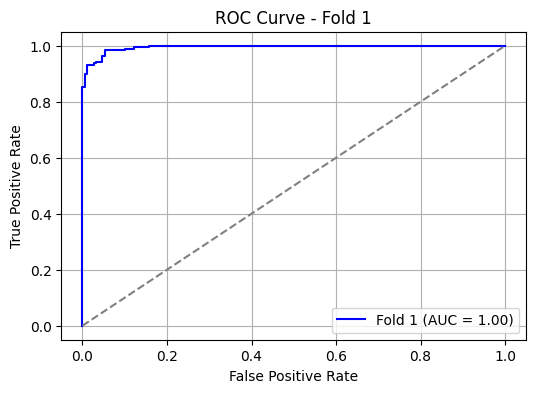


Starting Fold 2...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.5470 - auc: 0.5632 - loss: 0.9206 - val_accuracy: 0.6026 - val_auc: 0.7458 - val_loss: 1.1599
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.6953 - auc: 0.7732 - loss: 0.5912 - val_accuracy: 0.7763 - val_auc: 0.8355 - val_loss: 0.5650
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.7975 - auc: 0.8797 - loss: 0.4352 - val_accuracy: 0.8237 - val_auc: 0.9094 - val_loss: 0.4337
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.8509 - auc: 0.9240 - loss: 0.3505 - val_accuracy: 0.8632 - val_auc: 0.9454 - val_loss: 0.3726
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8797 - auc: 0.9521 - loss: 0.2792 - val_accuracy: 0.9237 - val_auc: 0.9776 - val_loss: 0.1950
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8875 - auc: 0.9631 - loss: 0.2448 - val_accuracy: 0.9184 - 

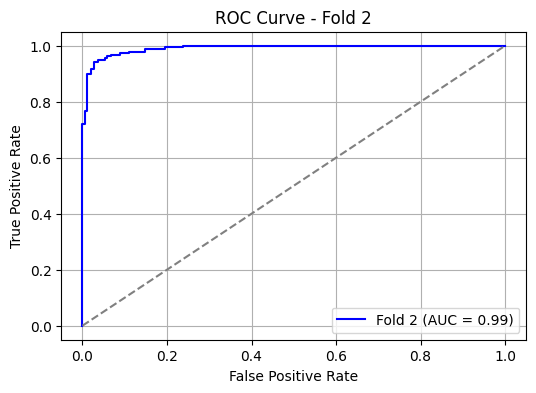


Starting Fold 3...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.5910 - auc: 0.6334 - loss: 0.8218 - val_accuracy: 0.5342 - val_auc: 0.7720 - val_loss: 1.4571
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - accuracy: 0.6803 - auc: 0.7496 - loss: 0.6238 - val_accuracy: 0.6947 - val_auc: 0.8409 - val_loss: 0.6176
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.7521 - auc: 0.8344 - loss: 0.5166 - val_accuracy: 0.8053 - val_auc: 0.9181 - val_loss: 0.3697
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.8198 - auc: 0.9027 - loss: 0.3967 - val_accuracy: 0.8368 - val_auc: 0.9427 - val_loss: 0.3452
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8519 - auc: 0.9272 - loss: 0.3466 - val_accuracy: 0.8763 - val_auc: 0.9776 - val_loss: 0.2431
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9085 - auc: 0.9720 - loss: 0.2161 - val_accuracy: 0.8737

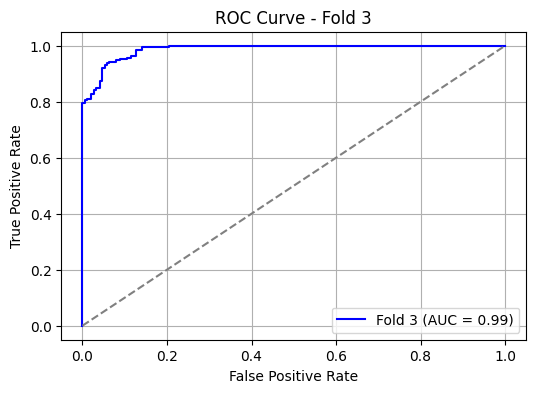


Starting Fold 4...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.5661 - auc: 0.5877 - loss: 0.8241 - val_accuracy: 0.6105 - val_auc: 0.6989 - val_loss: 1.1007
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.7133 - auc: 0.7674 - loss: 0.6012 - val_accuracy: 0.6842 - val_auc: 0.8477 - val_loss: 0.6460
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step - accuracy: 0.7891 - auc: 0.8804 - loss: 0.4392 - val_accuracy: 0.7711 - val_auc: 0.8880 - val_loss: 0.4476
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - accuracy: 0.8475 - auc: 0.9191 - loss: 0.3627 - val_accuracy: 0.8316 - val_auc: 0.9359 - val_loss: 0.3953
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.8839 - auc: 0.9551 - loss: 0.2744 - val_accuracy: 0.8947 - val_auc: 0.9662 - val_loss: 0.2355
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9084 - auc: 0.9658 - loss: 0.2314 - val_accuracy: 0.89

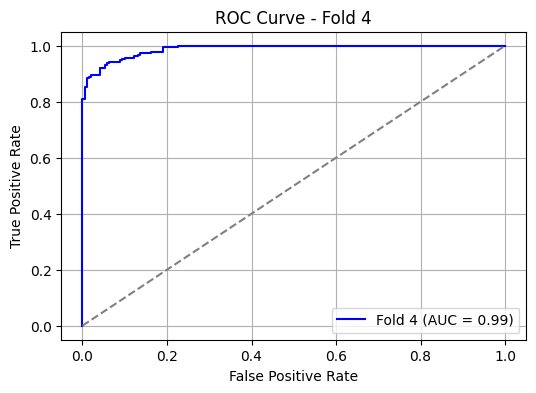


Starting Fold 5...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.5832 - auc: 0.6094 - loss: 0.8633 - val_accuracy: 0.5553 - val_auc: 0.6955 - val_loss: 1.4396
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.6820 - auc: 0.7539 - loss: 0.6177 - val_accuracy: 0.6789 - val_auc: 0.7832 - val_loss: 0.7881
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.7860 - auc: 0.8659 - loss: 0.4681 - val_accuracy: 0.8263 - val_auc: 0.9120 - val_loss: 0.3776
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8476 - auc: 0.9181 - loss: 0.3671 - val_accuracy: 0.8658 - val_auc: 0.9568 - val_loss: 0.2908
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8624 - auc: 0.9444 - loss: 0.3057 - val_accuracy: 0.8947 - val_auc: 0.9684 - val_loss: 0.2731
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9061 - auc: 0.9708 - loss: 0.2174 - val_accuracy: 0.8500 - v

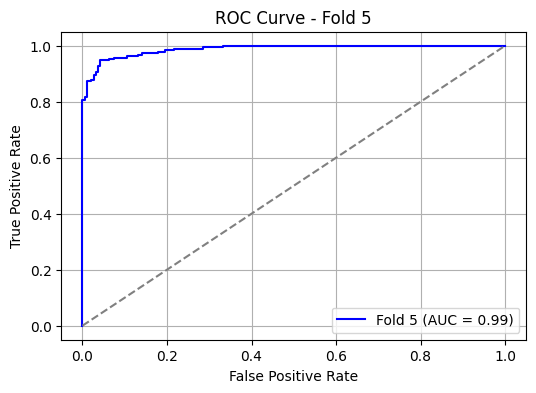

In [ ]:
fold_results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

for train_idx, val_idx in skf.split(X, y):
    print(f"\nStarting Fold {fold}...\n" + "-"*50)

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_dnn_model()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'dnn_best_fold_{fold}.keras', save_best_only=True, monitor='val_loss', verbose=0)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    y_pred_proba = model.predict(X_val)
    y_pred = (y_pred_proba > 0.5).astype("int32")

    acc = np.mean(y_pred.flatten() == y_val)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Final Report
    print(f"\nFold {fold} Results:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"AUC          : {roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_val, y_pred))

    # ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Fold {fold}")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    fold_results.append({
        'fold': fold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc': roc_auc
    })

    fold += 1

In [ ]:
best_fold_auc = max(fold_results, key=lambda x: x['auc'])

print("\nBest Fold Based on AUC:")
print(f"Fold     : {best_fold_auc['fold']}")
print(f"Accuracy : {best_fold_auc['accuracy']:.4f}")
print(f"Precision: {best_fold_auc['precision']:.4f}")
print(f"Recall   : {best_fold_auc['recall']:.4f}")
print(f"F1 Score : {best_fold_auc['f1']:.4f}")
print(f"AUC      : {best_fold_auc['auc']:.4f}")


Best Fold Based on AUC:
Fold     : 1
Accuracy : 0.9579
Precision: 0.9350
Recall   : 0.9842
F1 Score : 0.9590
AUC      : 0.9950


**Artificial Neural Network (ANN)**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [ ]:
def load_images(folder_path, label, image_size=(227, 227), limit=None):
    images, labels = [], []
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            img = cv2.imread(os.path.join(folder_path, fname), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            images.append(img / 255.0)
            labels.append(label)
            if limit and len(images) >= limit:
                break
    return np.array(images), np.array(labels)

# Set the number of images to be 950 for each class
num_images = 950

# Load exactly 950 images for each class
X_normal, y_normal = load_images(normal_path, 0, limit=num_images)
X_stroke, y_stroke = load_images(stroke_path, 1, limit=num_images)

# Combine the normal and stroke images
X = np.concatenate([X_normal, X_stroke])
y = np.concatenate([y_normal, y_stroke])

# Reshape for ANN
X = X.reshape(-1, 227, 227, 1)

print(f"Final Dataset Shape: {X.shape} | Labels: {y.shape}")

Final Dataset Shape: (1900, 227, 227, 1) | Labels: (1900,)


In [ ]:
def build_ann(input_shape=(227, 227, 1)):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(0.4),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=[
                      'accuracy',
                      tf.keras.metrics.AUC(name='auc'),
                      tf.keras.metrics.Precision(name='precision'),
                      tf.keras.metrics.Recall(name='recall')
                  ])
    return model


Fold 1 Training...
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.5218 - auc: 0.5283 - loss: 5.4271 - precision: 0.5433 - recall: 0.5150 - val_accuracy: 0.6289 - val_auc: 0.7906 - val_loss: 0.7954 - val_precision: 0.8769 - val_recall: 0.3000
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6246 - auc: 0.6763 - loss: 1.0465 - precision: 0.6451 - recall: 0.6265 - val_accuracy: 0.7211 - val_auc: 0.8079 - val_loss: 0.5113 - val_precision: 0.6963 - val_recall: 0.7842
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7197 - auc: 0.7905 - loss: 0.5739 - precision: 0.7398 - recall: 0.7008 - val_accuracy: 0.8026 - val_auc: 0.8980 - val_loss: 0.4130 - val_precision: 0.7861 - val_recall: 0.8316
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7704 - auc: 0.8556 - loss: 0.4697 - precision: 0.7558 - recall: 0.8020 - val_accuracy: 0.8184 - val_auc: 0.8991 - val_loss: 0.4117 - val_precision: 0.8457 - val_recall: 0.7789
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━

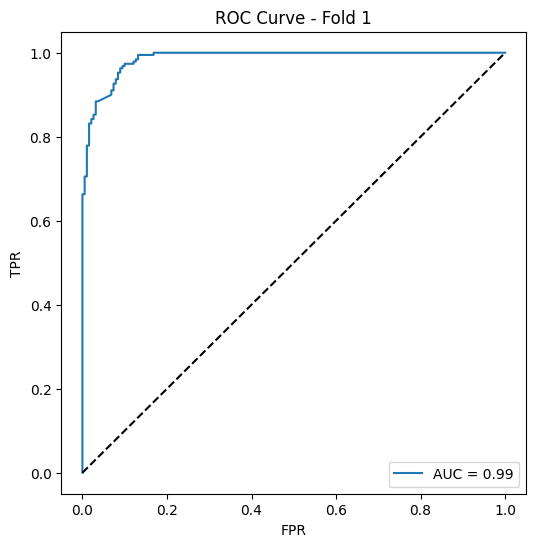


Fold 2 Training...
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.5436 - auc: 0.5545 - loss: 5.3979 - precision: 0.5745 - recall: 0.5145 - val_accuracy: 0.6605 - val_auc: 0.8119 - val_loss: 0.7424 - val_precision: 0.5968 - val_recall: 0.9895
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6046 - auc: 0.6499 - loss: 0.9914 - precision: 0.5968 - recall: 0.6191 - val_accuracy: 0.7395 - val_auc: 0.8525 - val_loss: 0.5276 - val_precision: 0.6717 - val_recall: 0.9368
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7162 - auc: 0.8056 - loss: 0.5301 - precision: 0.7262 - recall: 0.7435 - val_accuracy: 0.8289 - val_auc: 0.9310 - val_loss: 0.3558 - val_precision: 0.8049 - val_recall: 0.8684
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8090 - auc: 0.8953 - loss: 0.4014 - precision: 0.7985 - recall: 0.8290 - val_accuracy: 0.8605 - val_auc: 0.9361 - val_loss: 0.3262 - val_precision: 0.8624 - val_recall: 0.8579
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━

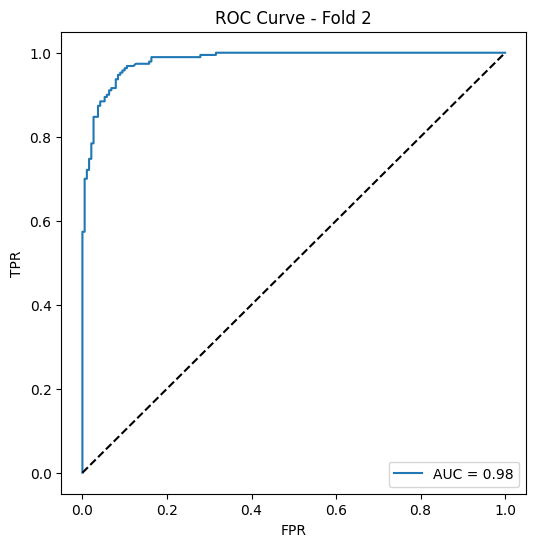


Fold 3 Training...
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.5219 - auc: 0.5208 - loss: 4.8963 - precision: 0.5201 - recall: 0.4902 - val_accuracy: 0.6184 - val_auc: 0.7906 - val_loss: 1.0333 - val_precision: 0.5684 - val_recall: 0.9842
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6221 - auc: 0.6716 - loss: 1.2362 - precision: 0.6153 - recall: 0.6466 - val_accuracy: 0.8026 - val_auc: 0.8970 - val_loss: 0.4400 - val_precision: 0.8485 - val_recall: 0.7368
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7465 - auc: 0.8324 - loss: 0.5139 - precision: 0.7431 - recall: 0.7333 - val_accuracy: 0.8737 - val_auc: 0.9514 - val_loss: 0.3534 - val_precision: 0.8318 - val_recall: 0.9368
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7763 - auc: 0.8786 - loss: 0.4315 - precision: 0.7718 - recall: 0.7656 - val_accuracy: 0.8237 - val_auc: 0.9340 - val_loss: 0.3755 - val_precision: 0.8154 - val_recall: 0.8368
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━

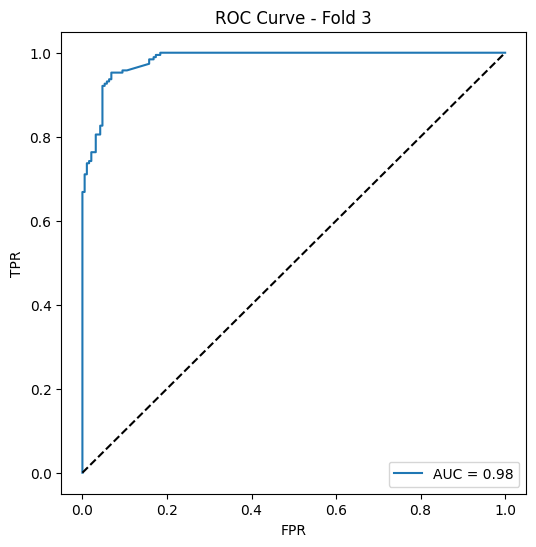


Fold 4 Training...
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.5127 - auc: 0.5113 - loss: 5.9367 - precision: 0.5230 - recall: 0.5256 - val_accuracy: 0.6289 - val_auc: 0.7353 - val_loss: 0.8192 - val_precision: 0.7526 - val_recall: 0.3842
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6357 - auc: 0.6808 - loss: 1.0126 - precision: 0.6276 - recall: 0.6356 - val_accuracy: 0.7711 - val_auc: 0.8725 - val_loss: 0.4718 - val_precision: 0.7004 - val_recall: 0.9474
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7358 - auc: 0.8269 - loss: 0.5295 - precision: 0.7240 - recall: 0.7498 - val_accuracy: 0.7026 - val_auc: 0.8711 - val_loss: 0.5159 - val_precision: 0.9326 - val_recall: 0.4368
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7288 - auc: 0.8247 - loss: 0.5047 - precision: 0.7540 - recall: 0.6906 - val_accuracy: 0.7895 - val_auc: 0.8968 - val_loss: 0.4340 - val_precision: 0.7957 - val_recall: 0.7789
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━

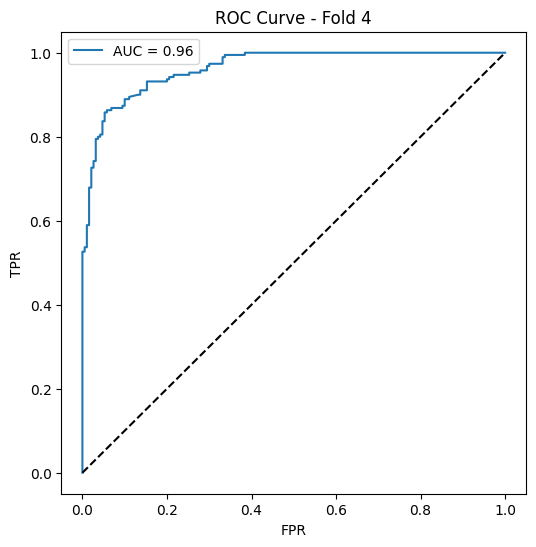


Fold 5 Training...
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.5079 - auc: 0.5136 - loss: 6.2170 - precision: 0.5130 - recall: 0.5201 - val_accuracy: 0.6079 - val_auc: 0.7124 - val_loss: 0.8129 - val_precision: 0.5663 - val_recall: 0.9211
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6035 - auc: 0.6506 - loss: 1.1336 - precision: 0.6092 - recall: 0.6189 - val_accuracy: 0.7368 - val_auc: 0.8652 - val_loss: 0.4846 - val_precision: 0.8309 - val_recall: 0.5947
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7125 - auc: 0.7897 - loss: 0.5712 - precision: 0.7091 - recall: 0.6764 - val_accuracy: 0.7474 - val_auc: 0.9033 - val_loss: 0.4597 - val_precision: 0.8983 - val_recall: 0.5579
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7706 - auc: 0.8603 - loss: 0.4548 - precision: 0.7708 - recall: 0.7819 - val_accuracy: 0.8447 - val_auc: 0.9483 - val_loss: 0.3548 - val_precision: 0.7811 - val_recall: 0.9579
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━

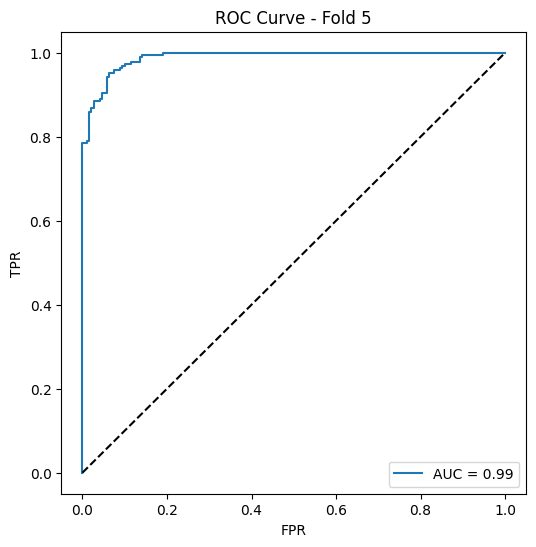


Best Fold Based on AUC:
Fold 5 — AUC: 0.9888
Accuracy: 0.9237
Precision: 0.9399
Recall: 0.9053
F1 Score: 0.9223


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

# List to store fold results
fold_results = []

for train_idx, val_idx in skf.split(X, y):
    print(f"\nFold {fold} Training...\n{'-'*40}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = build_ann()
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stop],
        verbose=1
    )

    # Predictions
    y_pred_proba = model.predict(X_val).flatten()
    y_pred = (y_pred_proba > 0.5).astype("int32")

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Store fold results
    fold_results.append({
        'fold': fold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'auc': roc_auc
    })

    print(f"\nFold {fold} Results:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"AUC          : {roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_val, y_pred))

    # Plot ROC
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC Curve - Fold {fold}')
    plt.legend()
    plt.show()

    fold += 1

# Step 1: Choose the best fold based on AUC (or any other metric)
best_fold_auc = max(fold_results, key=lambda x: x['auc'])

# Step 2: Output the best fold details
print("\nBest Fold Based on AUC:")
print(f"Fold {best_fold_auc['fold']} — AUC: {best_fold_auc['auc']:.4f}")
print(f"Accuracy: {best_fold_auc['accuracy']:.4f}")
print(f"Precision: {best_fold_auc['precision']:.4f}")
print(f"Recall: {best_fold_auc['recall']:.4f}")
print(f"F1 Score: {best_fold_auc['f1_score']:.4f}")

**Recurrent Nueral Network**

In [ ]:
from google.colab import drive
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"
print("Normal Path:", os.path.exists(normal_path))
print("Stroke Path:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path: True
Stroke Path: True


In [ ]:
def load_images(folder_path, label, image_size=(227, 227), limit=950):
    images, labels = [], []
    count = 0
    for file in os.listdir(folder_path):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)
            img = img / 255.0
            images.append(img)
            labels.append(label)
            count += 1
            if count == limit:
                break
    return images, labels
normal_imgs, normal_labels = load_images(normal_path, 0, limit=950)
stroke_imgs, stroke_labels = load_images(stroke_path, 1, limit=950)

X = np.array(normal_imgs + stroke_imgs)
y = np.array(normal_labels + stroke_labels)
X_rnn = X.reshape(-1, 227, 227)

print("Total Samples:", len(X_rnn), "| Normal:", len(normal_imgs), "| Stroke:", len(stroke_imgs))

Total Samples: 1900 | Normal: 950 | Stroke: 950


In [ ]:
def create_rnn_model():
    model = Sequential([
        Input(shape=(227, 227)),
        SimpleRNN(128, activation='tanh',return_sequences=False),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model


Fold 1 — Training...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.6509 - auc: 0.6924 - loss: 0.7319 - val_accuracy: 0.8763 - val_auc: 0.9358 - val_loss: 0.4581
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8055 - auc: 0.8841 - loss: 0.4315 - val_accuracy: 0.9079 - val_auc: 0.9496 - val_loss: 0.3170
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8651 - auc: 0.9255 - loss: 0.3522 - val_accuracy: 0.9053 - val_auc: 0.9658 - val_loss: 0.2657
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8813 - auc: 0.9570 - loss: 0.2652 - val_accuracy: 0.9026 - val_auc: 0.9713 - val_loss: 0.2402
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9088 - auc: 0.9686 - loss: 0.2273 - val_accuracy: 0.8947 - val_auc: 0.9741 - val_loss: 0.2190
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9291 - auc: 0.9832 - loss: 0.1700 - val_accuracy: 0.9289 - 

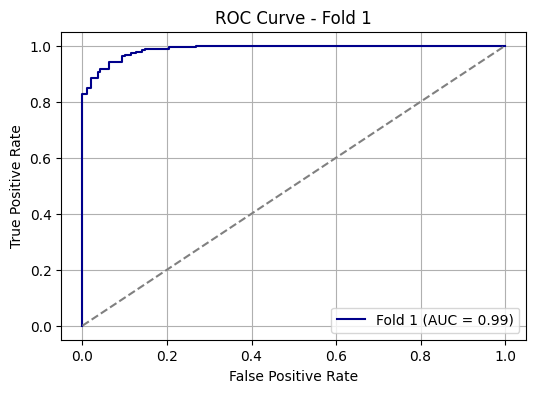


Fold 2 — Training...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.6283 - auc: 0.6631 - loss: 0.7766 - val_accuracy: 0.8184 - val_auc: 0.9051 - val_loss: 0.4747
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8080 - auc: 0.8910 - loss: 0.4225 - val_accuracy: 0.8211 - val_auc: 0.9402 - val_loss: 0.4094
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8391 - auc: 0.9256 - loss: 0.3572 - val_accuracy: 0.9000 - val_auc: 0.9655 - val_loss: 0.2696
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8997 - auc: 0.9645 - loss: 0.2420 - val_accuracy: 0.8737 - val_auc: 0.9476 - val_loss: 0.2955
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9150 - auc: 0.9718 - loss: 0.2169 - val_accuracy: 0.8868 - val_auc: 0.9750 - val_loss: 0.2262
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9194 - auc: 0.9763 - loss: 0.1968 - val_accuracy: 0.9237 - 

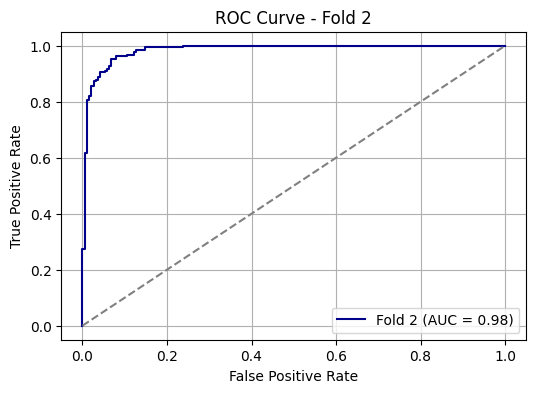


Fold 3 — Training...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.6413 - auc: 0.6934 - loss: 0.6986 - val_accuracy: 0.7711 - val_auc: 0.9216 - val_loss: 0.5127
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8256 - auc: 0.9070 - loss: 0.3840 - val_accuracy: 0.8263 - val_auc: 0.9648 - val_loss: 0.4199
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8455 - auc: 0.9391 - loss: 0.3112 - val_accuracy: 0.8632 - val_auc: 0.9748 - val_loss: 0.3312
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8980 - auc: 0.9697 - loss: 0.2231 - val_accuracy: 0.8184 - val_auc: 0.9736 - val_loss: 0.3531
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9329 - auc: 0.9865 - loss: 0.1589 - val_accuracy: 0.8632 - val_auc: 0.9791 - val_loss: 0.3072
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9288 - auc: 0.9851 - loss: 0.1615 - val_accuracy: 0.9263 - 

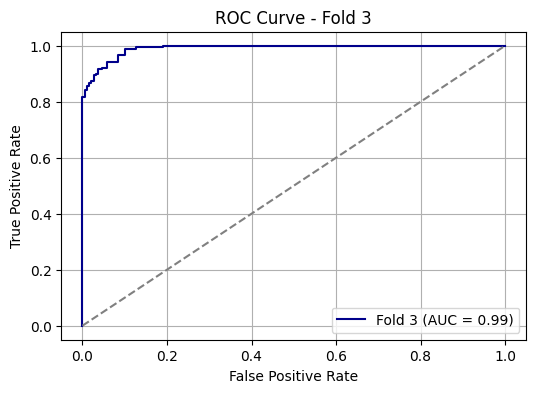


Fold 4 — Training...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.6497 - auc: 0.7028 - loss: 0.7274 - val_accuracy: 0.8368 - val_auc: 0.9238 - val_loss: 0.4771
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8367 - auc: 0.9109 - loss: 0.3837 - val_accuracy: 0.8737 - val_auc: 0.9634 - val_loss: 0.3555
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8736 - auc: 0.9557 - loss: 0.2723 - val_accuracy: 0.9053 - val_auc: 0.9794 - val_loss: 0.2869
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8946 - auc: 0.9682 - loss: 0.2303 - val_accuracy: 0.8816 - val_auc: 0.9798 - val_loss: 0.2409
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9122 - auc: 0.9770 - loss: 0.2009 - val_accuracy: 0.9105 - val_auc: 0.9811 - val_loss: 0.1929
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9302 - auc: 0.9840 - loss: 0.1634 - val_accuracy: 0.9237 - 

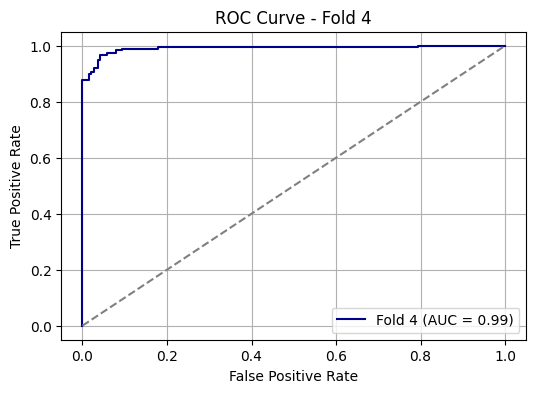


Fold 5 — Training...
--------------------------------------------------
Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.6369 - auc: 0.6653 - loss: 0.7848 - val_accuracy: 0.7605 - val_auc: 0.9199 - val_loss: 0.5197
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8316 - auc: 0.9062 - loss: 0.3902 - val_accuracy: 0.8632 - val_auc: 0.9259 - val_loss: 0.4239
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8747 - auc: 0.9504 - loss: 0.2836 - val_accuracy: 0.8816 - val_auc: 0.9764 - val_loss: 0.2834
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8886 - auc: 0.9629 - loss: 0.2550 - val_accuracy: 0.9132 - val_auc: 0.9800 - val_loss: 0.2429
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9272 - auc: 0.9807 - loss: 0.1764 - val_accuracy: 0.8921 - val_auc: 0.9818 - val_loss: 0.2502
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9252 - auc: 0.9802 - loss: 0.1825 - val_accuracy: 0.9237 - v

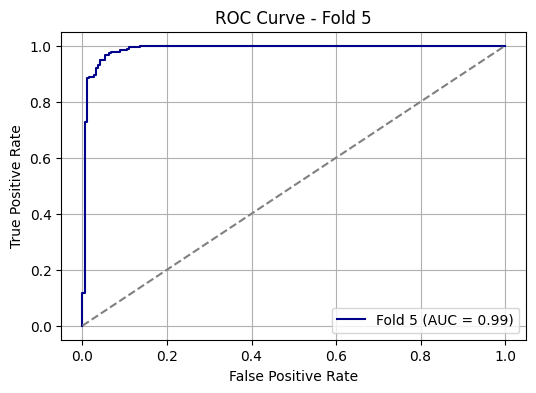

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
fold_results = []

for train_idx, val_idx in skf.split(X_rnn, y):
    print(f"\nFold {fold} — Training...\n" + "-"*50)

    X_train, X_val = X_rnn[train_idx], X_rnn[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = create_rnn_model()

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f"rnn_best_fold_{fold}.keras", save_best_only=True, monitor='val_loss')
    ]

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )

    # Evaluate model
    y_pred_proba = model.predict(X_val)
    y_pred = (y_pred_proba > 0.5).astype("int32")

    # Calculate metrics
    acc = np.mean(y_pred.flatten() == y_val)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Store fold results
    fold_results.append({
        "fold": fold,
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1,
        "auc": roc_auc
    })

    # Print fold results
    print(f"\nFold {fold} Results:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"AUC          : {roc_auc:.4f}")
    print("Classification Report:\n", classification_report(y_val, y_pred))

    # Plot ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {roc_auc:.2f})', color='darkblue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Fold {fold}")
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    fold += 1


In [ ]:
best_fold_auc = max(fold_results, key=lambda x: x['auc'])

print("\nBest Fold Based on AUC:")
print(f"Fold {best_fold_auc['fold']} — AUC: {best_fold_auc['auc']:.4f}")
print(f"Accuracy: {best_fold_auc['accuracy']:.4f}")
print(f"Precision: {best_fold_auc['precision']:.4f}")
print(f"Recall: {best_fold_auc['recall']:.4f}")
print(f"F1 Score: {best_fold_auc['f1_score']:.4f}")


Best Fold Based on AUC:
Fold 3 — AUC: 0.9907
Accuracy: 0.9395
Precision: 0.9196
Recall: 0.9632
F1 Score: 0.9409


# CNN(using Feature Extraction)


Modified AlexNET

In [ ]:
# 1. Mount Drive and check paths
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))


Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
# 2. Load and Preprocess Images
import cv2
import numpy as np
from tqdm import tqdm

def load_balanced_images(normal_folder, stroke_folder, img_size=(227, 227)):
    images, labels = [], []
    max_images = 950  # Balance both classes

    for folder, label in [(normal_folder, 0), (stroke_folder, 1)]:
        count = 0
        files = os.listdir(folder)
        files.sort()  # Optional: For consistent order
        for filename in tqdm(files[:max_images], desc=f'Loading {"Normal" if label==0 else "Stroke"}'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label)
                count += 1
        print(f"Loaded {count} {'Normal' if label==0 else 'Stroke'} images")

    images = np.array(images).reshape(-1, 227, 227, 1).astype('float32') / 255.0
    labels = np.array(labels)
    return images, labels

X, y = load_balanced_images(normal_path, stroke_path)
print(f"\nFinal Dataset Shape: {X.shape}, Labels: {y.shape}")


Loading Normal: 100%|██████████| 950/950 [00:21<00:00, 43.53it/s] 


Loaded 950 Normal images


Loading Stroke: 100%|██████████| 950/950 [00:17<00:00, 54.68it/s] 


Loaded 950 Stroke images

Final Dataset Shape: (1900, 227, 227, 1), Labels: (1900,)


In [ ]:
# 3. Split into Train, Validation, and Test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training Set:   {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set:    {X_test.shape[0]} samples")


Training Set:   1330 samples
Validation Set: 285 samples
Testing Set:    285 samples


In [ ]:
# 4. Define the AlexNet-Based Model
import tensorflow as tf
from tensorflow.keras import layers, models, Input

input_shape = (227, 227, 1)
inputs = Input(shape=input_shape)

# Conv1
x = layers.Conv2D(64, (16, 8), padding='same', activation='relu', name='Conv1')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Conv2
x = layers.Conv2D(192, (8, 4), padding='same', activation='relu', name='Conv2')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Conv3-1, 3-2, 3-3
x = layers.Conv2D(384, (4, 4), padding='same', activation='relu', name='Conv3-1')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (4, 4), padding='same', activation='relu', name='Conv3-2')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (4, 4), padding='same', activation='relu', name='Conv3-3')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

# Special Pooling (4x2)
x = layers.MaxPooling2D(pool_size=(4, 2), strides=(1, 1), padding='valid', name='Pool4-2')(x)

# FC Layers
x = layers.GlobalAveragePooling2D()(x)  # Reduce size before FC
x = layers.Dense(4096, activation='relu', name='Fc4')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(4096, activation='relu', name='Fc5')(x)
outputs = layers.Dense(2, activation='softmax', name='Fc6softmax')(x)


modified_alexnet = models.Model(inputs=inputs, outputs=outputs)
modified_alexnet.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 227, 227, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 227, 227, 64)   │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 227, 227, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 113, 113, 192)  │       393,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 113, 113, 192)  │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 56, 56, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3-1 (Conv2D)                │ (None, 56, 56, 384)    │     1,180,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 56, 56, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3-2 (Conv2D)                │ (None, 56, 56, 256)    │     1,573,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3-3 (Conv2D)                │ (None, 56, 56, 256)    │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool4-2 (MaxPooling2D)          │ (None, 25, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fc4 (Dense)                     │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fc5 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fc6softmax (Dense)              │ (None, 2)              │         8,194 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,050,434 (84.12 MB)

 Trainable params: 22,048,130 (84.11 MB)

 Non-trainable params: 2,304 (9.00 KB)

In [ ]:
# 5. Compile and Train the Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modified_alexnet.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max'),
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')
]

history = modified_alexnet.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=8,
    callbacks=callbacks,
    verbose=1
)

modified_alexnet.save('stroke_detection_model.h5')
print("Model training complete and saved!")


Epoch 1/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5064 - loss: 1.5535

167/167 ━━━━━━━━━━━━━━━━━━━━ 69s 333ms/step - accuracy: 0.5065 - loss: 1.5496 - val_accuracy: 0.5018 - val_loss: 0.9055
Epoch 2/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 58s 223ms/step - accuracy: 0.5542 - loss: 0.6912 - val_accuracy: 0.5018 - val_loss: 0.8104
Epoch 3/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 42s 228ms/step - accuracy: 0.6288 - loss: 0.6509 - val_accuracy: 0.5018 - val_loss: 1.2251
Epoch 4/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.6520 - loss: 0.6129 - val_accuracy: 0.5018 - val_loss: 2.7887
Epoch 5/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.7215 - loss: 0.5714

167/167 ━━━━━━━━━━━━━━━━━━━━ 48s 274ms/step - accuracy: 0.7213 - loss: 0.5717 - val_accuracy: 0.7263 - val_loss: 0.5449
Epoch 6/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 76s 238ms/step - accuracy: 0.6732 - loss: 0.6010 - val_accuracy: 0.6842 - val_loss: 0.6104
Epoch 7/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 40s 230ms/step - accuracy: 0.6855 - loss: 0.5875 - val_accuracy: 0.5123 - val_loss: 1.1465
Epoch 8/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.7103 - loss: 0.5633

167/167 ━━━━━━━━━━━━━━━━━━━━ 44s 249ms/step - accuracy: 0.7104 - loss: 0.5633 - val_accuracy: 0.7684 - val_loss: 0.5059
Epoch 9/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7356 - loss: 0.5429

167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 252ms/step - accuracy: 0.7356 - loss: 0.5429 - val_accuracy: 0.8140 - val_loss: 0.4601
Epoch 10/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.7899 - loss: 0.4969 - val_accuracy: 0.4982 - val_loss: 4.7041
Epoch 11/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 233ms/step - accuracy: 0.7379 - loss: 0.5274 - val_accuracy: 0.5123 - val_loss: 1.9659
Epoch 12/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - accuracy: 0.7654 - loss: 0.4993 - val_accuracy: 0.7614 - val_loss: 0.4668
Epoch 13/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 39s 231ms/step - accuracy: 0.8017 - loss: 0.4668 - val_accuracy: 0.6807 - val_loss: 1.0664
Epoch 14/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.7725 - loss: 0.5289 - val_accuracy: 0.7333 - val_loss: 0.4825


Model training complete and saved!


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Evaluate on test set
test_loss, test_accuracy = modified_alexnet.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

# Predict classes
y_pred = modified_alexnet.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is already in label format (not one-hot), use directly
y_true_classes = y_test

# Classification report
print("📊 Classification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=["Normal", "Stroke"], zero_division=0))


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.7909 - loss: 0.4684
✅ Test Accuracy: 0.7719
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Normal       0.81      0.71      0.76       143
      Stroke       0.74      0.83      0.78       142

    accuracy                           0.77       285
   macro avg       0.78      0.77      0.77       285
weighted avg       0.78      0.77      0.77       285



In [ ]:
from tensorflow.keras import models
import numpy as np

# Create feature extractor model from the second FC layer (Fc5)
feature_extractor = models.Model(inputs=modified_alexnet.input,
                                 outputs=modified_alexnet.get_layer("Fc5").output)

# Extract features
train_features = feature_extractor.predict(X_train)
val_features = feature_extractor.predict(X_val)
test_features = feature_extractor.predict(X_test)

# Save features as .npy files
np.save("modified_alexnet_features_train.npy", train_features)
np.save("modified_alexnet_features_val.npy", val_features)
np.save("modified_alexnet_features_test.npy", test_features)

print("Modified AlexNet features saved as .npy files successfully.")


42/42 ━━━━━━━━━━━━━━━━━━━━ 937s 22s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 203s 22s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 198s 22s/step
Modified AlexNet features saved as .npy files successfully.


Modified InceptionV3

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
# 2. Load and Preprocess Images for InceptionV3
import cv2
import numpy as np
from tqdm import tqdm

def load_balanced_images(normal_folder, stroke_folder, img_size=(299, 299)):  # InceptionV3 requires 299x299
    images, labels = [], []
    max_images = 950  # Balance both classes

    for folder, label in [(normal_folder, 0), (stroke_folder, 1)]:
        count = 0
        files = os.listdir(folder)
        files.sort()  # Optional: For consistent order
        for filename in tqdm(files[:max_images], desc=f'Loading {"Normal" if label==0 else "Stroke"}'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # InceptionV3 expects RGB
                images.append(img)
                labels.append(label)
                count += 1
        print(f"Loaded {count} {'Normal' if label==0 else 'Stroke'} images")

    images = np.array(images).astype('float32') / 255.0  # Normalize to [0,1]
    labels = np.array(labels)
    return images, labels

X, y = load_balanced_images(normal_path, stroke_path)
print(f"\nFinal Dataset Shape: {X.shape}, Labels: {y.shape}")

Loading Normal: 100%|██████████| 950/950 [00:22<00:00, 42.56it/s] 


Loaded 950 Normal images


Loading Stroke: 100%|██████████| 950/950 [00:13<00:00, 69.00it/s] 


Loaded 950 Stroke images

Final Dataset Shape: (1900, 299, 299, 3), Labels: (1900,)


In [ ]:
# 3. Split into Train, Validation, and Test (same as before)
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training Set:   {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set:    {X_test.shape[0]} samples")

Training Set:   1330 samples
Validation Set: 285 samples
Testing Set:    285 samples


In [ ]:
# 4. Define the InceptionV3-Based Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers, models, Input

# Load pre-trained InceptionV3 without top layers
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(299, 299, 3)  # InceptionV3 expects 299x299 RGB images
)

# Freeze the base model
base_model.trainable = False

# Create new model on top
inputs = Input(shape=(299, 299, 3))
x = base_model(inputs, training=False)

# Add custom layers
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(2, activation='softmax')(x)

inceptionv3_model = models.Model(inputs, outputs)
inceptionv3_model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,903,010 (91.18 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# 5. Compile and Train the Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

inceptionv3_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    ModelCheckpoint('best_inceptionv3_model.h5', save_best_only=True, monitor='val_accuracy', mode='max'),
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss')
]

history = inceptionv3_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=8,
    callbacks=callbacks,
    verbose=1
)

inceptionv3_model.save('stroke_detection_inceptionv3.h5')
print("InceptionV3 model training complete and saved!")

Epoch 1/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5826 - loss: 0.7178

167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 182ms/step - accuracy: 0.5829 - loss: 0.7176 - val_accuracy: 0.6421 - val_loss: 0.6597
Epoch 2/15
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6614 - loss: 0.6118

167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.6617 - loss: 0.6116 - val_accuracy: 0.7509 - val_loss: 0.5030
Epoch 3/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7462 - loss: 0.4860

167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.7462 - loss: 0.4860 - val_accuracy: 0.7614 - val_loss: 0.5004
Epoch 4/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8083 - loss: 0.4495 - val_accuracy: 0.7509 - val_loss: 0.5024
Epoch 5/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8278 - loss: 0.4024

167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.8277 - loss: 0.4024 - val_accuracy: 0.7719 - val_loss: 0.4981
Epoch 6/15
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8233 - loss: 0.3963

167/167 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8234 - loss: 0.3961 - val_accuracy: 0.7825 - val_loss: 0.4887
Epoch 7/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8394 - loss: 0.3639 - val_accuracy: 0.7579 - val_loss: 0.5270
Epoch 8/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.8247 - loss: 0.3789 - val_accuracy: 0.7579 - val_loss: 0.4929
Epoch 9/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8342 - loss: 0.3738

167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8342 - loss: 0.3737 - val_accuracy: 0.8105 - val_loss: 0.4355
Epoch 10/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8866 - loss: 0.2801 - val_accuracy: 0.7754 - val_loss: 0.4757
Epoch 11/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.8818 - loss: 0.2999 - val_accuracy: 0.7930 - val_loss: 0.4672
Epoch 12/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8873 - loss: 0.2833

167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.8873 - loss: 0.2832 - val_accuracy: 0.8175 - val_loss: 0.4390
Epoch 13/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9019 - loss: 0.2645 - val_accuracy: 0.8035 - val_loss: 0.4520
Epoch 14/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9072 - loss: 0.2421 - val_accuracy: 0.7439 - val_loss: 0.5597


InceptionV3 model training complete and saved!


In [ ]:
# 6. Evaluate the Model
import numpy as np
from sklearn.metrics import classification_report

# Evaluate on test set
test_loss, test_accuracy = inceptionv3_model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_accuracy:.4f}")

# Predict classes
y_pred = inceptionv3_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["Normal", "Stroke"], zero_division=0))

9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7332 - loss: 0.4840
✅ Test Accuracy: 0.7649
9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 856ms/step
📊 Classification Report:
              precision    recall  f1-score   support

      Normal       0.78      0.75      0.76       143
      Stroke       0.76      0.78      0.77       142

    accuracy                           0.76       285
   macro avg       0.77      0.76      0.76       285
weighted avg       0.77      0.76      0.76       285



In [ ]:
# 7. Extract and Save Features (from GlobalAveragePooling layer)
from tensorflow.keras import models
import numpy as np

# Create feature extractor model
feature_extractor = models.Model(
    inputs=inceptionv3_model.input,
    outputs=inceptionv3_model.get_layer("global_average_pooling2d_2").output
)

# Extract features
train_features = feature_extractor.predict(X_train)
val_features = feature_extractor.predict(X_val)
test_features = feature_extractor.predict(X_test)

# Save features as .npy files
np.save("inceptionv3_features_train.npy", train_features)
np.save("inceptionv3_features_val.npy", val_features)
np.save("inceptionv3_features_test.npy", test_features)

print("InceptionV3 features saved as .npy files successfully.")

42/42 ━━━━━━━━━━━━━━━━━━━━ 360s 8s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step
InceptionV3 features saved as .npy files successfully.


VGG19

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import cv2
import numpy as np
from tqdm import tqdm

def load_balanced_images(normal_folder, stroke_folder, img_size=(224, 224)):  # VGG19 requires 224x224
    images, labels = [], []
    max_images = 950  # Balance both classes

    for folder, label in [(normal_folder, 0), (stroke_folder, 1)]:
        count = 0
        files = os.listdir(folder)
        files.sort()  # Optional: For consistent order
        for filename in tqdm(files[:max_images], desc=f'Loading {"Normal" if label==0 else "Stroke"}'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # VGG19 expects RGB
                images.append(img)
                labels.append(label)
                count += 1
        print(f"Loaded {count} {'Normal' if label==0 else 'Stroke'} images")

    images = np.array(images).astype('float32') / 255.0  # Normalize to [0,1]
    labels = np.array(labels)
    return images, labels

X, y = load_balanced_images(normal_path, stroke_path)
print(f"\nFinal Dataset Shape: {X.shape}, Labels: {y.shape}")

Loading Normal: 100%|██████████| 950/950 [00:29<00:00, 31.75it/s] 


Loaded 950 Normal images


Loading Stroke: 100%|██████████| 950/950 [00:16<00:00, 58.60it/s]


Loaded 950 Stroke images

Final Dataset Shape: (1900, 224, 224, 3), Labels: (1900,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training Set:   {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set:    {X_test.shape[0]} samples")

Training Set:   1330 samples
Validation Set: 285 samples
Testing Set:    285 samples


In [ ]:
# 4. Define the Exact VGG19 Architecture with Global Average Pooling
from tensorflow.keras import layers, models, Input

def build_vgg19_gap(input_shape=(224, 224, 3), num_classes=2):
    inputs = Input(shape=input_shape, name='input_image')

    # Block 1 (2 conv layers @ 64)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_1')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv1_2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool1')(x)

    # Block 2 (2 conv layers @ 128)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_1')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv2_2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool2')(x)

    # Block 3 (4 conv layers @ 256)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_1')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_2')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_3')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='conv3_4')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool3')(x)

    # Block 4 (4 conv layers @ 512)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_3')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv4_4')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool4')(x)

    # Block 5 (4 conv layers @ 512)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_3')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5_4')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='pool5')(x)

    # Replace Flatten with Global Average Pooling
    x = layers.GlobalAveragePooling2D(name='global_avg_pool')(x)

    # Fully Connected Layers
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)
    outputs = layers.Dense(num_classes, activation='softmax', name='output')(x)

    return models.Model(inputs=inputs, outputs=outputs, name='vgg19_gap')

# Create model
vgg19_gap = build_vgg19_gap(input_shape=(224, 224, 3))
vgg19_gap.summary()

Model: "vgg19_gap"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_1 (Conv2D)                │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_3 (Conv2D)                │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_4 (Conv2D)                │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_1 (Conv2D)                │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_2 (Conv2D)                │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_3 (Conv2D)                │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4_4 (Conv2D)                │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5_1 (Conv2D)                │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5_2 (Conv2D)                │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5_3 (Conv2D)                │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5_4 (Conv2D)                │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool5 (MaxPooling2D)            │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │     2,101,248 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 38,915,138 (148.45 MB)

 Trainable params: 38,915,138 (148.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Compile the model
vgg19_gap.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    ModelCheckpoint('best_vgg19_gap.h5',
                   monitor='val_accuracy',
                   save_best_only=True,
                   mode='max'),
    EarlyStopping(monitor='val_loss',
                  patience=7,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.2,
                      patience=3,
                      min_lr=1e-7)
]

# Train the model
history = vgg19_gap.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# Save the final model
vgg19_gap.save('vgg19_gap_final.h5')
print("Training complete and model saved!")

Epoch 1/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.4778 - loss: 0.6935

84/84 ━━━━━━━━━━━━━━━━━━━━ 60s 624ms/step - accuracy: 0.4777 - loss: 0.6935 - val_accuracy: 0.4982 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 2/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.4904 - loss: 0.6933

84/84 ━━━━━━━━━━━━━━━━━━━━ 74s 564ms/step - accuracy: 0.4904 - loss: 0.6933 - val_accuracy: 0.5018 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 3/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 352ms/step - accuracy: 0.4802 - loss: 0.6934 - val_accuracy: 0.4982 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 4/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - accuracy: 0.5023 - loss: 0.6933 - val_accuracy: 0.4982 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 5/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 355ms/step - accuracy: 0.4997 - loss: 0.6933 - val_accuracy: 0.4982 - val_loss: 0.6932 - learning_rate: 2.0000e-05
Epoch 6/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 355ms/step - accuracy: 0.5221 - loss: 0.6929 - val_accuracy: 0.4982 - val_loss: 0.6932 - learning_rate: 2.0000e-05
Epoch 7/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 355ms/step - accuracy: 0.4970 - loss: 0.6932 - val_accuracy: 0.4982 - val_loss: 0.6932 - learning_rate: 2.0000e-05
Epoch 8/15
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 354ms/step - accuracy: 0.47

Training complete and model saved!


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on test set
test_loss, test_acc = vgg19_gap.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred = vgg19_gap.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_classes,
                           target_names=["Normal", "Stroke"],
                           digits=4))




✅ Test Accuracy: 0.4982
✅ Test Loss: 0.6932
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step

📊 Classification Report:
              precision    recall  f1-score   support

      Normal     0.0000    0.0000    0.0000       143
      Stroke     0.4982    1.0000    0.6651       142

    accuracy                         0.4982       285
   macro avg     0.2491    0.5000    0.3326       285
weighted avg     0.2482    0.4982    0.3314       285



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras import models
import numpy as np

# Create feature extractor from the Global Average Pooling layer
feature_extractor = models.Model(
    inputs=vgg19_gap.input,
    outputs=vgg19_gap.get_layer('global_avg_pool').output
)

# Extract features
print("\nExtracting features...")
train_features = feature_extractor.predict(X_train)
val_features = feature_extractor.predict(X_val)
test_features = feature_extractor.predict(X_test)

# Save features
np.save("vgg19_gap_train_features.npy", train_features)
np.save("vgg19_gap_val_features.npy", val_features)
np.save("vgg19_gap_test_features.npy", test_features)
print("Features saved successfully!")




Extracting features...
42/42 ━━━━━━━━━━━━━━━━━━━━ 1047s 25s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 228s 25s/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 223s 25s/step
Features saved successfully!


## **NasNETLarge**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))

Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import cv2
import numpy as np
from tqdm import tqdm

def load_balanced_images(normal_folder, stroke_folder, img_size=(331, 331)):  # NASNetLarge requires 331x331
    images, labels = [], []
    max_images = 950  # Balance both classes

    for folder, label in [(normal_folder, 0), (stroke_folder, 1)]:
        count = 0
        files = os.listdir(folder)
        files.sort()  # Optional: For consistent order
        for filename in tqdm(files[:max_images], desc=f'Loading {"Normal" if label==0 else "Stroke"}'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # NASNet expects RGB
                images.append(img)
                labels.append(label)
                count += 1
        print(f"Loaded {count} {'Normal' if label==0 else 'Stroke'} images")

    images = np.array(images).astype('float32') / 255.0  # Normalize to [0,1]
    labels = np.array(labels)
    return images, labels

X, y = load_balanced_images(normal_path, stroke_path)
print(f"\nFinal Dataset Shape: {X.shape}, Labels: {y.shape}")

Loading Normal: 100%|██████████| 950/950 [00:34<00:00, 27.22it/s]


Loaded 950 Normal images


Loading Stroke: 100%|██████████| 950/950 [00:27<00:00, 34.33it/s]


Loaded 950 Stroke images

Final Dataset Shape: (1900, 331, 331, 3), Labels: (1900,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training Set:   {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set:    {X_test.shape[0]} samples")

Training Set:   1330 samples
Validation Set: 285 samples
Testing Set:    285 samples


In [ ]:
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras import layers, models, Input

# Load pre-trained NASNetLarge without top layers
base_model = NASNetLarge(
    weights='imagenet',
    include_top=False,
    input_shape=(331, 331, 3)  # NASNetLarge expects 331x331 RGB images
)
base_model.trainable = False
inputs = Input(shape=(331, 331, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation='softmax')(x)

nasnet_model = models.Model(inputs, outputs)
nasnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 331, 331, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ nasnet_large (Functional)       │ (None, 11, 11, 4032)   │    84,916,818 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 4032)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,129,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,048,660 (339.69 MB)

 Trainable params: 4,131,842 (15.76 MB)

 Non-trainable params: 84,916,818 (323.93 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

nasnet_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    ModelCheckpoint('best_nasnet_model.h5',
                   monitor='val_accuracy',
                   save_best_only=True,
                   mode='max'),
    EarlyStopping(monitor='val_loss',
                  patience=5,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.2,
                      patience=3,
                      min_lr=1e-7)
]

history = nasnet_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,  # Fewer epochs may be sufficient for transfer learning
    batch_size=8,  # Smaller batch size due to memory constraints
    callbacks=callbacks,
    verbose=1
)

nasnet_model.save('stroke_detection_nasnet.h5')
print("NASNetLarge model training complete and saved!")

Epoch 1/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.5968 - loss: 0.7090

167/167 ━━━━━━━━━━━━━━━━━━━━ 165s 687ms/step - accuracy: 0.5970 - loss: 0.7088 - val_accuracy: 0.7228 - val_loss: 0.5410 - learning_rate: 1.0000e-04
Epoch 2/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7092 - loss: 0.5552

167/167 ━━━━━━━━━━━━━━━━━━━━ 53s 285ms/step - accuracy: 0.7092 - loss: 0.5553 - val_accuracy: 0.7754 - val_loss: 0.5062 - learning_rate: 1.0000e-04
Epoch 3/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.7313 - loss: 0.5133

167/167 ━━━━━━━━━━━━━━━━━━━━ 85s 303ms/step - accuracy: 0.7312 - loss: 0.5134 - val_accuracy: 0.7860 - val_loss: 0.5126 - learning_rate: 1.0000e-04
Epoch 4/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 269ms/step - accuracy: 0.7914 - loss: 0.4590 - val_accuracy: 0.7684 - val_loss: 0.4812 - learning_rate: 1.0000e-04
Epoch 5/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8179 - loss: 0.3950

167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 269ms/step - accuracy: 0.8180 - loss: 0.3951 - val_accuracy: 0.7895 - val_loss: 0.4590 - learning_rate: 1.0000e-04
Epoch 6/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8457 - loss: 0.3560

167/167 ━━━━━━━━━━━━━━━━━━━━ 49s 294ms/step - accuracy: 0.8456 - loss: 0.3561 - val_accuracy: 0.8000 - val_loss: 0.4490 - learning_rate: 1.0000e-04
Epoch 7/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 45s 271ms/step - accuracy: 0.8647 - loss: 0.3258 - val_accuracy: 0.7895 - val_loss: 0.4348 - learning_rate: 1.0000e-04
Epoch 8/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 81s 267ms/step - accuracy: 0.8910 - loss: 0.2820 - val_accuracy: 0.7895 - val_loss: 0.4383 - learning_rate: 1.0000e-04
Epoch 9/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 266ms/step - accuracy: 0.8648 - loss: 0.3023 - val_accuracy: 0.7930 - val_loss: 0.4424 - learning_rate: 1.0000e-04
Epoch 10/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 44s 263ms/step - accuracy: 0.8908 - loss: 0.2698 - val_accuracy: 0.7754 - val_loss: 0.4427 - learning_rate: 1.0000e-04
Epoch 11/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9332 - loss: 0.2334

167/167 ━━━━━━━━━━━━━━━━━━━━ 47s 284ms/step - accuracy: 0.9332 - loss: 0.2333 - val_accuracy: 0.8070 - val_loss: 0.4139 - learning_rate: 2.0000e-05
Epoch 12/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.9520 - loss: 0.1932

167/167 ━━━━━━━━━━━━━━━━━━━━ 107s 644ms/step - accuracy: 0.9520 - loss: 0.1933 - val_accuracy: 0.8175 - val_loss: 0.4076 - learning_rate: 2.0000e-05
Epoch 13/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.9471 - loss: 0.1960

167/167 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9471 - loss: 0.1961 - val_accuracy: 0.8211 - val_loss: 0.4032 - learning_rate: 2.0000e-05
Epoch 14/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 76s 267ms/step - accuracy: 0.9590 - loss: 0.1645 - val_accuracy: 0.8105 - val_loss: 0.4053 - learning_rate: 2.0000e-05
Epoch 15/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 267ms/step - accuracy: 0.9503 - loss: 0.1713 - val_accuracy: 0.8140 - val_loss: 0.4343 - learning_rate: 2.0000e-05


NASNetLarge model training complete and saved!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate on test set
test_loss, test_acc = nasnet_model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred = nasnet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_classes,
                           target_names=["Normal", "Stroke"],
                           digits=4))




✅ Test Accuracy: 0.8175
✅ Test Loss: 0.3883
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step

📊 Classification Report:
              precision    recall  f1-score   support

      Normal     0.8054    0.8392    0.8219       143
      Stroke     0.8309    0.7958    0.8129       142

    accuracy                         0.8175       285
   macro avg     0.8181    0.8175    0.8174       285
weighted avg     0.8181    0.8175    0.8174       285



In [ ]:
# 7. Feature Extraction with Correct Layer Name
from tensorflow.keras import models
import numpy as np

# Create feature extractor using the correct layer name
feature_extractor = models.Model(
    inputs=nasnet_model.input,
    outputs=nasnet_model.get_layer('global_average_pooling2d').output  # Corrected layer name
)

# Extract features
print("\nExtracting features from NASNetLarge...")
train_features = feature_extractor.predict(X_train)
val_features = feature_extractor.predict(X_val)
test_features = feature_extractor.predict(X_test)

# Save features
np.save("nasnet_train_features.npy", train_features)
np.save("nasnet_val_features.npy", val_features)
np.save("nasnet_test_features.npy", test_features)
print("✅ NASNetLarge features extracted and saved successfully!")



Extracting features from NASNetLarge...
27/42 ━━━━━━━━━━━━━━━━━━━━ 11:33 46s/step

## **ShuffleNET**

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)

normal_path = "/content/drive/MyDrive/Normal"
stroke_path = "/content/drive/MyDrive/Stroke"

print("Normal Path Exists:", os.path.exists(normal_path))
print("Stroke Path Exists:", os.path.exists(stroke_path))


Mounted at /content/drive
Normal Path Exists: True
Stroke Path Exists: True


In [ ]:
import cv2
import numpy as np
from tqdm import tqdm

def load_balanced_images(normal_folder, stroke_folder, img_size=(224, 224)):
    images, labels = [], []
    max_images = 950  # Balance both classes

    for folder, label in [(normal_folder, 0), (stroke_folder, 1)]:
        count = 0
        files = os.listdir(folder)
        files.sort()
        for filename in tqdm(files[:max_images], desc=f'Loading {"Normal" if label==0 else "Stroke"}'):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
                labels.append(label)
                count += 1
        print(f"Loaded {count} {'Normal' if label==0 else 'Stroke'} images")

    images = np.array(images).astype('float32') / 255.0
    labels = np.array(labels)
    return images, labels

X, y = load_balanced_images(normal_path, stroke_path)
print(f"\nFinal Dataset Shape: {X.shape}, Labels: {y.shape}")


Loading Normal: 100%|██████████| 950/950 [00:41<00:00, 23.11it/s]


Loaded 950 Normal images


Loading Stroke: 100%|██████████| 950/950 [00:50<00:00, 18.70it/s]


Loaded 950 Stroke images

Final Dataset Shape: (1900, 224, 224, 3), Labels: (1900,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Training Set:   {X_train.shape[0]} samples")
print(f"Validation Set: {X_val.shape[0]} samples")
print(f"Testing Set:    {X_test.shape[0]} samples")


Training Set:   1330 samples
Validation Set: 285 samples
Testing Set:    285 samples


In [ ]:
!git clone https://github.com/opconty/keras-shufflenetV2.git
%cd keras-shufflenetV2


Cloning into 'keras-shufflenetV2'...
remote: Enumerating objects: 25, done.
remote: Total 25 (delta 0), reused 0 (delta 0), pack-reused 25 (from 1)
Receiving objects: 100% (25/25), 6.03 MiB | 10.07 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/keras-shufflenetV2


In [ ]:
!rm -f keras-shufflenetV2/shufflenetv2.py


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, BatchNormalization, ReLU, Concatenate, DepthwiseConv2D, Lambda

# Split Channels for Channel Shuffle
def channel_split(x):
    def split_tensor(tensor):
        in_channels = tf.shape(tensor)[-1]
        return tf.split(tensor, num_or_size_splits=2, axis=-1)
    return Lambda(lambda z: split_tensor(z))(x)

# Perform Channel Shuffle
def channel_shuffle(x, groups):
    def shuffle(z):
        shape = tf.shape(z)
        batch_size, height, width, channels = shape[0], shape[1], shape[2], shape[3]
        group_channels = channels // groups
        z = tf.reshape(z, [batch_size, height, width, groups, group_channels])
        z = tf.transpose(z, [0, 1, 2, 4, 3])
        z = tf.reshape(z, [batch_size, height, width, channels])
        return z
    return Lambda(shuffle)(x)

# Convolutional branch for ShuffleNetV2
def conv_branch(x, out_channels, stride):
    x = Conv2D(out_channels, 1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = DepthwiseConv2D(3, strides=stride, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)

    x = Conv2D(out_channels, 1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# Shuffle Unit Block
def shuffle_unit(inputs, out_channels, stride):
    if stride == 1:
        split = channel_split(inputs)
        x1 = Lambda(lambda z: z[0])(split)
        x2 = Lambda(lambda z: z[1])(split)
        x2 = conv_branch(x2, out_channels // 2, stride)
        out = Concatenate(axis=-1)([x1, x2])
    else:
        x1 = conv_branch(inputs, out_channels // 2, stride)
        x2 = conv_branch(inputs, out_channels // 2, stride)
        out = Concatenate(axis=-1)([x1, x2])
    return channel_shuffle(out, 2)

# ShuffleNetV2 Feature Extractor Model
def ShuffleNetV2_FeatureExtractor(input_shape=(224, 224, 3), scale_factor=1.0, output_dim=1000):
    input = Input(shape=input_shape)

    # Define channel sizes for various scale factors
    out_channels_dict = {
        0.5: [24, 48, 96, 192, 1024],
        1.0: [24, 116, 232, 464, 1024],
        1.5: [24, 176, 352, 704, 1024],
        2.0: [24, 244, 488, 976, 2048]
    }

    out_channels = out_channels_dict[scale_factor]

    # Initial Convolution Block
    x = Conv2D(out_channels[0], 3, strides=2, padding='same', use_bias=False)(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Stages with repeated ShuffleNetV2 blocks
    stages_repeat = [4, 8, 4]  # This can be adjusted based on the scale_factor

    for stage, reps in enumerate(stages_repeat):
        out_ch = out_channels[stage + 1]
        for i in range(reps):
            stride = 2 if i == 0 else 1
            x = shuffle_unit(x, out_ch, stride)

    # Final Convolution and Pooling Block
    x = Conv2D(out_channels[-1], 1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = GlobalAveragePooling2D()(x)

    # Final Fully Connected Layer
    output = Dense(output_dim, activation='softmax')(x)  # Softmax for multi-class classification

    model = models.Model(inputs=input, outputs=output, name="ShuffleNetV2_FeatureExtractor")
    return model

# Instantiate and summarize the model
model = ShuffleNetV2_FeatureExtractor(input_shape=(224, 224, 3), scale_factor=1.0, output_dim=1000)
model.summary()



Model: "ShuffleNetV2_FeatureExtractor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │        648 │ input_layer[0][0] │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │      1,392 │ max_pooling2d[0]… │
│                     │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │      1,392 │ max_pooling2d[0]… │
│                     │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        232 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        232 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d    │ (None, 28, 28,    │        522 │ re_lu_1[0][0]     │
│ (DepthwiseConv2D)   │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ depthwise_conv2d_1  │ (None, 28, 28,    │        522 │ re_lu_3[0][0]     │
│ (DepthwiseConv2D)   │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        232 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        232 │ depthwise_conv2d… │
│ (BatchNormalizatio… │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 28, 28,    │      3,364 │ batch_normalizat… │
│                     │ 58)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 28, 28,    │      3,364 │ batch_normalizat

 Total params: 2,367,494 (9.03 MB)

 Trainable params: 2,350,434 (8.97 MB)

 Non-trainable params: 17,060 (66.64 KB)

In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Model Checkpointing, Early Stopping, and Learning Rate Scheduling
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

callbacks = [
    ModelCheckpoint('best_shufflenet_model.h5',
                    monitor='val_accuracy',
                    save_best_only=True,
                    mode='max'),
    EarlyStopping(monitor='val_loss',
                  patience=5,
                  restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss',
                      factor=0.2,
                      patience=3,
                      min_lr=1e-7)
]

# Train the model (ensure your training data is prepared: X_train, y_train, X_val, y_val)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,  # Adjust the number of epochs if needed
    batch_size=8,
    callbacks=callbacks,
    verbose=1
)

# Save the trained model
model.save('stroke_detection_shufflenet.h5')
print("ShuffleNet model training complete and saved!")

Epoch 1/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3695 - loss: 4.2116

167/167 ━━━━━━━━━━━━━━━━━━━━ 82s 194ms/step - accuracy: 0.3704 - loss: 4.2009 - val_accuracy: 0.5018 - val_loss: 2.9107 - learning_rate: 1.0000e-04
Epoch 2/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.6549 - loss: 0.6895 - val_accuracy: 0.5018 - val_loss: 2.4082 - learning_rate: 1.0000e-04
Epoch 3/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.7610 - loss: 0.5413 - val_accuracy: 0.5018 - val_loss: 6.9080 - learning_rate: 1.0000e-04
Epoch 4/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8494 - loss: 0.3766 - val_accuracy: 0.5018 - val_loss: 6.4742 - learning_rate: 1.0000e-04
Epoch 5/15
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9173 - loss: 0.2221

167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9174 - loss: 0.2218 - val_accuracy: 0.7404 - val_loss: 0.6816 - learning_rate: 1.0000e-04
Epoch 6/15
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9338 - loss: 0.1770

167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9337 - loss: 0.1773 - val_accuracy: 0.9053 - val_loss: 0.2687 - learning_rate: 1.0000e-04
Epoch 7/15
165/167 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9405 - loss: 0.1607

167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9405 - loss: 0.1608 - val_accuracy: 0.9298 - val_loss: 0.2126 - learning_rate: 1.0000e-04
Epoch 8/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9424 - loss: 0.1617 - val_accuracy: 0.9298 - val_loss: 0.1986 - learning_rate: 1.0000e-04
Epoch 9/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9676 - loss: 0.0969 - val_accuracy: 0.9018 - val_loss: 0.2729 - learning_rate: 1.0000e-04
Epoch 10/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9452 - loss: 0.1386 - val_accuracy: 0.9228 - val_loss: 0.2542 - learning_rate: 1.0000e-04
Epoch 11/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9709 - loss: 0.0902 - val_accuracy: 0.9298 - val_loss: 0.1482 - learning_rate: 1.0000e-04
Epoch 12/15
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9578 - loss: 0.1131

167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9577 - loss: 0.1132 - val_accuracy: 0.9368 - val_loss: 0.1569 - learning_rate: 1.0000e-04
Epoch 13/15
166/167 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9555 - loss: 0.1155

167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9555 - loss: 0.1154 - val_accuracy: 0.9649 - val_loss: 0.0958 - learning_rate: 1.0000e-04
Epoch 14/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9668 - loss: 0.1212 - val_accuracy: 0.9649 - val_loss: 0.1421 - learning_rate: 1.0000e-04
Epoch 15/15
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9809 - loss: 0.0657 - val_accuracy: 0.9579 - val_loss: 0.1097 - learning_rate: 1.0000e-04


ShuffleNet model training complete and saved!


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_classes,
                           target_names=["Normal", "Stroke"],  # Replace with your classes if different
                           digits=4))




✅ Test Accuracy: 0.9579
✅ Test Loss: 0.1236
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 623ms/step

📊 Classification Report:
              precision    recall  f1-score   support

      Normal     0.9712    0.9441    0.9574       143
      Stroke     0.9452    0.9718    0.9583       142

    accuracy                         0.9579       285
   macro avg     0.9582    0.9579    0.9579       285
weighted avg     0.9583    0.9579    0.9579       285



In [ ]:
from tensorflow.keras import models
import numpy as np

# Extract features just before the final Dense layer (based on your model's last Conv or Concatenate layer)
# We assume the final layer before classification is 'concatenate_24' (or similar based on your model structure)
feature_extractor = models.Model(
    inputs=model.input,
    outputs=model.get_layer('concatenate_4').output  # Use the correct last Conv or Concatenate layer
)

# Extract features
print("\nExtracting features from ShuffleNetV2...")
train_features = feature_extractor.predict(X_train)
val_features = feature_extractor.predict(X_val)
test_features = feature_extractor.predict(X_test)

# Save features as .npy files
np.save('shufflenet_train_features.npy', train_features)
np.save('shufflenet_val_features.npy', val_features)
np.save('shufflenet_test_features.npy', test_features)

print("✅ ShuffleNetV2 features extracted and saved successfully!")



Extracting features from ShuffleNetV2...
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 906ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 413ms/step
✅ ShuffleNetV2 features extracted and saved successfully!


GA implementation

In [ ]:
with open('modified_alexnet_features_train.npy', 'rb') as f:
    content = f.read()
    print("File size in bytes:", len(content))


File size in bytes: 5242880


In [ ]:
import numpy as np
import os

# Step 1: Load the raw binary file
file_path = 'modified_alexnet_features_train.npy'
with open(file_path, 'rb') as f:
    f.seek(128)  # Skip the .npy header (usually 128 bytes)
    raw_data = np.frombuffer(f.read(), dtype=np.float32)

# Step 2: Check total number of elements
print("Total elements:", raw_data.size)  # Should be 1310688

# Step 3: Try to reshape based on known image count (1330)
num_images = 1330
features_per_image = raw_data.size // num_images  # Should be 985
print("Features per image:", features_per_image)

# Step 4: Reshape and save
alexnet_features = raw_data[:num_images * features_per_image].reshape((num_images, features_per_image))
print("Recovered shape:", alexnet_features.shape)

# Step 5: Save the fixed version for future use
np.save('clean_alexnet_features_train.npy', alexnet_features)


Total elements: 1310688
Features per image: 985
Recovered shape: (1330, 985)


In [ ]:
alexnet_features = np.load('clean_alexnet_features_train.npy')


In [ ]:
import numpy as np
import os

file_path = 'nasnet_train_features.npy'
file_size = os.path.getsize(file_path)  # bytes

# Try loading raw first
try:
    nasnet_raw = np.load(file_path, allow_pickle=True)
    print("Loaded shape:", nasnet_raw.shape)
    print("Dtype:", nasnet_raw.dtype)
except Exception as e:
    print("Error loading nasnet:", e)
    print("File size in bytes:", file_size)


Error loading nasnet: cannot reshape array of size 262112 into shape (1330,4032)
File size in bytes: 1048576


In [ ]:
import numpy as np
import os

# Step 1: Load the raw binary file for NASNet
file_path = 'nasnet_train_features.npy'
with open(file_path, 'rb') as f:
    f.seek(128)  # Skip the .npy header (usually 128 bytes)
    raw_data = np.frombuffer(f.read(), dtype=np.float32)

# Step 2: Check total number of elements
print("Total elements:", raw_data.size)  # Should be 262112

# Step 3: Try to reshape based on known image count (1330)
num_images = 1330
features_per_image = raw_data.size // num_images  # Should be 197
print("Features per image:", features_per_image)

# Step 4: Reshape and save
nasnet_features = raw_data[:num_images * features_per_image].reshape((num_images, features_per_image))
print("Recovered shape:", nasnet_features.shape)

# Step 5: Save the fixed version for future use
np.save('clean_nasnet_features_train.npy', nasnet_features)


Total elements: 262112
Features per image: 197
Recovered shape: (1330, 197)


In [ ]:
# Load the reshaped NASNet features
nasnet_features = np.load('clean_nasnet_features_train.npy')
print(f"NASNet features shape: {nasnet_features.shape}")


NASNet features shape: (1330, 197)


In [ ]:
with open('modified_alexnet_features_val.npy', 'rb') as f:
    content = f.read()
    print("File size in bytes:", len(content))


File size in bytes: 4194304


In [ ]:
import numpy as np
import os

# Step 1: Load the raw binary file for validation
file_path_val = 'modified_alexnet_features_val.npy'
with open(file_path_val, 'rb') as f:
    f.seek(128)  # Skip the .npy header (usually 128 bytes)
    raw_data_val = np.frombuffer(f.read(), dtype=np.float32)

# Step 2: Check total number of elements
print("Total elements for validation:", raw_data_val.size)  # Check the total size

# Step 3: Try to reshape based on known image count (256)
num_images_val = 256
features_per_image_val = raw_data_val.size // num_images_val  # Calculate features per image
print("Features per image for validation:", features_per_image_val)

# Step 4: Reshape and save
alexnet_features_val = raw_data_val[:num_images_val * features_per_image_val].reshape((num_images_val, features_per_image_val))
print("Recovered shape for validation:", alexnet_features_val.shape)

# Step 5: Save the fixed version for future use
np.save('clean_alexnet_features_val.npy', alexnet_features_val)


Total elements for validation: 1048544
Features per image for validation: 4095
Recovered shape for validation: (256, 4095)


In [ ]:
# Load the reshaped AlexNet validation features
alexnet_features_val = np.load('clean_alexnet_features_val.npy')
print(f"AlexNet validation features shape: {alexnet_features_val.shape}")


AlexNet validation features shape: (256, 4095)


In [ ]:
import os
print("Current directory:", os.getcwd())


Current directory: /content


In [ ]:
import os
print("Files in current directory:", os.listdir('/content'))


Files in current directory: ['.config', 'clean_alexnet_features_train.npy', 'nasnet_train_features.npy', 'y_val.npy', 'inceptionv3_features_val.npy', 'y_train.npy', 'drive', 'modified_alexnet_features_train.npy', 'nasnet_val_features.npy', 'clean_alexnet_features_val.npy', 'clean_nasnet_features_train.npy', 'shufflenet_test_features.npy', 'shufflenet_val_features.npy', 'vgg19_gap_train_features.npy', 'inceptionv3_features_test.npy', 'inceptionv3_features_train (1).npy', 'nasnet_test_features.npy', 'modified_alexnet_features_val.npy', 'vgg19_gap_test_features.npy', 'shufflenet_train_features.npy', 'inceptionv3_features_train.npy', 'vgg19_gap_val_features.npy', 'modified_alexnet_features_test.npy', 'sample_data']


In [ ]:
from sklearn.model_selection import train_test_split

# Split into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Save the labels
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)
print("Saved 'y_train.npy' and 'y_val.npy'")


NameError: name 'X' is not defined

In [ ]:
import numpy as np
import os

# Step 1: Load the raw binary file for ShuffleNet
file_path = 'shufflenet_train_features.npy'
with open(file_path, 'rb') as f:
    f.seek(128)  # Skip the .npy header (commonly around 128 bytes)
    raw_data = np.frombuffer(f.read(), dtype=np.float32)

# Step 2: Check total number of elements
print("Total elements:", raw_data.size)

# Step 3: Try to reshape based on known image count (1330)
num_images = 1330
features_per_image = raw_data.size // num_images
print("Features per image:", features_per_image)

# Step 4: Reshape and check
shufflenet_features = raw_data[:num_images * features_per_image].reshape((num_images, features_per_image))
print("Recovered shape:", shufflenet_features.shape)

# Step 5: Save the cleaned version
np.save('clean_shufflenet_features_train.npy', shufflenet_features)


Total elements: 524256
Features per image: 394
Recovered shape: (1330, 394)


In [ ]:
import numpy as np
import os

# Step 1: Load the raw binary file for InceptionV3
file_path = 'inceptionv3_train_features.npy'
with open(file_path, 'rb') as f:
    f.seek(128)  # Skip the .npy header (usually around 128 bytes)
    raw_data = np.frombuffer(f.read(), dtype=np.float32)

# Step 2: Check total number of elements
print("Total elements:", raw_data.size)

# Step 3: Try to reshape based on known image count (1330)
num_images = 1330
features_per_image = raw_data.size // num_images
print("Features per image:", features_per_image)

# Step 4: Reshape and check
inceptionv3_features = raw_data[:num_images * features_per_image].reshape((num_images, features_per_image))
print("Recovered shape:", inceptionv3_features.shape)

# Step 5: Save the cleaned version
np.save('clean_inceptionv3_features_train.npy', inceptionv3_features)


FileNotFoundError: [Errno 2] No such file or directory: 'inceptionv3_train_features.npy'

In [ ]:
import numpy as np

# Step 1: Load the training feature vectors for each model
shufflenet_train_features = np.load('clean_shufflenet_features_train.npy')
vgg19_train_features = np.load('vgg19_gap_train_features.npy')
inceptionv3_train_features = np.load('inceptionv3_features_train.npy')
alexnet_train_features = np.load('clean_alexnet_features_train.npy')
nasnet_train_features = np.load('clean_nasnet_features_train.npy')

# Step 2: Flatten the 4D arrays (if they exist) in training features
if len(shufflenet_train_features.shape) == 4:
    shufflenet_train_features = shufflenet_train_features.reshape(shufflenet_train_features.shape[0], -1)
if len(vgg19_train_features.shape) == 4:
    vgg19_train_features = vgg19_train_features.reshape(vgg19_train_features.shape[0], -1)
if len(inceptionv3_train_features.shape) == 4:
    inceptionv3_train_features = inceptionv3_train_features.reshape(inceptionv3_train_features.shape[0], -1)
if len(alexnet_train_features.shape) == 4:
    alexnet_train_features = alexnet_train_features.reshape(alexnet_train_features.shape[0], -1)
if len(nasnet_train_features.shape) == 4:
    nasnet_train_features = nasnet_train_features.reshape(nasnet_train_features.shape[0], -1)

# Step 3: Concatenate all the training feature vectors
X_train_features = np.concatenate([
    shufflenet_train_features,
    vgg19_train_features,
    inceptionv3_train_features,
    alexnet_train_features,
    nasnet_train_features
], axis=1)

# Step 4: Load the validation feature vectors for each model
shufflenet_val_features = np.load('shufflenet_val_features.npy')
vgg19_val_features = np.load('vgg19_gap_val_features.npy')
inceptionv3_val_features = np.load('inceptionv3_features_val.npy')
alexnet_val_features = np.load('clean_alexnet_features_val.npy')
nasnet_val_features = np.load('nasnet_val_features.npy')

# Step 5: Flatten the 4D arrays (if they exist) in validation features
if len(shufflenet_val_features.shape) == 4:
    shufflenet_val_features = shufflenet_val_features.reshape(shufflenet_val_features.shape[0], -1)
if len(vgg19_val_features.shape) == 4:
    vgg19_val_features = vgg19_val_features.reshape(vgg19_val_features.shape[0], -1)
if len(inceptionv3_val_features.shape) == 4:
    inceptionv3_val_features = inceptionv3_val_features.reshape(inceptionv3_val_features.shape[0], -1)
if len(alexnet_val_features.shape) == 4:
    alexnet_val_features = alexnet_val_features.reshape(alexnet_val_features.shape[0], -1)
if len(nasnet_val_features.shape) == 4:
    nasnet_val_features = nasnet_val_features.reshape(nasnet_val_features.shape[0], -1)

# Step 6: Check the shape of all validation feature arrays
print("shufflenet_val_features shape:", shufflenet_val_features.shape)
print("vgg19_val_features shape:", vgg19_val_features.shape)
print("inceptionv3_val_features shape:", inceptionv3_val_features.shape)
print("alexnet_val_features shape:", alexnet_val_features.shape)
print("nasnet_val_features shape:", nasnet_val_features.shape)

# Step 7: Ensure all validation sets have the same number of samples
min_samples = min(
    shufflenet_val_features.shape[0],
    vgg19_val_features.shape[0],
    inceptionv3_val_features.shape[0],
    alexnet_val_features.shape[0],
    nasnet_val_features.shape[0]
)

# Step 8: Trim the arrays to the minimum number of samples
shufflenet_val_features = shufflenet_val_features[:min_samples]
vgg19_val_features = vgg19_val_features[:min_samples]
inceptionv3_val_features = inceptionv3_val_features[:min_samples]
alexnet_val_features = alexnet_val_features[:min_samples]
nasnet_val_features = nasnet_val_features[:min_samples]

# Step 9: Concatenate validation features after trimming
X_val_features = np.concatenate([
    shufflenet_val_features,
    vgg19_val_features,
    inceptionv3_val_features,
    alexnet_val_features,
    nasnet_val_features
], axis=1)

# Step 10: Load the labels for both training and validation sets
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')

# Step 11: Check the shape of the concatenated feature matrices
print("Shape of X_train_features:", X_train_features.shape)
print("Shape of X_val_features:", X_val_features.shape)


ValueError: cannot reshape array of size 262112 into shape (1330,2048)

In [ ]:
from tensorflow.keras import models, layers

def build_nn(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def evaluate_fitness(individual, X_train, y_train, X_val, y_val):
    selected_indices = np.where(individual == 1)[0]

    if len(selected_indices) == 0:
        return 0  # Avoid training with no features

    X_train_selected = X_train[:, selected_indices]
    X_val_selected = X_val[:, selected_indices]

    model = build_nn(X_train_selected.shape[1])

    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    model.fit(X_train_selected, y_train,
              validation_data=(X_val_selected, y_val),
              epochs=10, batch_size=32, verbose=0, callbacks=[early_stop])

    _, val_acc = model.evaluate(X_val_selected, y_val, verbose=0)
    return val_acc


In [ ]:
def initialize_population(pop_size, num_features):
    return np.random.randint(2, size=(pop_size, num_features))

def tournament_selection(pop, fitness_scores, k=3):
    selected = []
    for _ in range(len(pop)):
        contenders = np.random.choice(len(pop), k, replace=False)
        winner = pop[contenders[np.argmax(fitness_scores[contenders])]]
        selected.append(winner)
    return np.array(selected)

def single_point_crossover(parent1, parent2, rate=0.8):
    if np.random.rand() < rate:
        point = np.random.randint(1, len(parent1))
        return np.concatenate([parent1[:point], parent2[point:]]), \
               np.concatenate([parent2[:point], parent1[point:]])
    return parent1.copy(), parent2.copy()

def bit_flip_mutation(individual, rate=0.05):
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] ^= 1  # Flip bit
    return individual


In [ ]:
import os
import numpy as np
import pickle

def save_checkpoint(gen, population, best_fitness, best_solution, path="ga_checkpoint.pkl"):
    checkpoint = {
        "generation": gen,
        "population": population,
        "best_fitness": best_fitness,
        "best_solution": best_solution
    }
    with open(path, "wb") as f:
        pickle.dump(checkpoint, f)

def load_checkpoint(path="ga_checkpoint.pkl"):
    if os.path.exists(path):
        with open(path, "rb") as f:
            return pickle.load(f)
    return None

def run_ga(X_train, y_train, X_val, y_val, generations=10, pop_size=20, checkpoint_path="ga_checkpoint.pkl"):
    num_features = X_train.shape[1]

    # Load checkpoint if available
    checkpoint = load_checkpoint(checkpoint_path)

    if checkpoint:
        start_gen = checkpoint["generation"] + 1
        population = checkpoint["population"]
        best_fitness = checkpoint["best_fitness"]
        best_solution = checkpoint["best_solution"]
        print(f"Resuming from generation {start_gen}")
    else:
        start_gen = 1
        population = initialize_population(pop_size, num_features)
        best_fitness = -np.inf
        best_solution = None
        print("Starting new GA run")

    for gen in range(start_gen, generations + 1):
        print(f"\nGeneration {gen}/{generations}")
        fitness_scores = np.array([
            evaluate_fitness(ind, X_train, y_train, X_val, y_val) for ind in population
        ])

        best_gen_fit = np.max(fitness_scores)
        best_gen_sol = population[np.argmax(fitness_scores)]

        if best_gen_fit > best_fitness:
            best_fitness = best_gen_fit
            best_solution = best_gen_sol.copy()

        print(f"Best fitness in Gen {gen}: {best_gen_fit:.4f}")

        selected = tournament_selection(population, fitness_scores)
        next_gen = []

        for i in range(0, pop_size, 2):
            parent1, parent2 = selected[i], selected[i + 1]
            child1, child2 = single_point_crossover(parent1, parent2)
            next_gen.append(bit_flip_mutation(child1))
            next_gen.append(bit_flip_mutation(child2))

        population = np.array(next_gen)

        # Save checkpoint after each generation
        save_checkpoint(gen, population, best_fitness, best_solution, checkpoint_path)

    return best_solution


In [ ]:
print("X_train_features shape:", X_train_features.shape)
print("y_train shape:", y_train.shape)
print("X_val_features shape:", X_val_features.shape)
print("y_val shape:", y_val.shape)


X_train_features shape: (1330, 985)
y_train shape: (1330,)
X_val_features shape: (256, 4095)
y_val shape: (570,)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


NameError: name 'X_train' is not defined

In [ ]:
y_val = y_val[:X_val_features.shape[0]]


In [ ]:
# Run GA to get best feature mask
best_features = run_ga(X_train_features, y_train, X_val_features, y_val)

# Extract selected features
X_train_selected = X_train_features[:, best_features == 1]
X_val_selected = X_val_features[:, best_features == 1]

# Train final model
final_model = build_nn(X_train_selected.shape[1])
final_model.fit(X_train_selected, y_train, epochs=10, batch_size=32, verbose=1)

# Final evaluation
_, final_acc = final_model.evaluate(X_val_selected, y_val)
print("Final Validation Accuracy with GA-selected features:", final_acc)



Generation 1/10
Best fitness in Gen 1: 0.5312

Generation 2/10


In [ ]:
import numpy as np

# Step 1: Load the training feature vectors for each model

alexnet_train_features = np.load('clean_alexnet_features_train.npy')


# Step 2: Flatten the 4D arrays (if they exist) in training features

if len(alexnet_train_features.shape) == 4:
    alexnet_train_features = alexnet_train_features.reshape(alexnet_train_features.shape[0], -1)


# Step 3: Concatenate all the training feature vectors
X_train_features = np.concatenate([
    alexnet_train_features
], axis=1)

# Step 4: Load the validation feature vectors for each model
alexnet_val_features = np.load('clean_alexnet_features_val.npy')


# Step 5: Flatten the 4D arrays (if they exist) in validation features

if len(alexnet_val_features.shape) == 4:
    alexnet_val_features = alexnet_val_features.reshape(alexnet_val_features.shape[0], -1)

# Step 6: Check the shape of all validation feature arrays

print("alexnet_val_features shape:", alexnet_val_features.shape)




# Step 9: Concatenate validation features after trimming
X_val_features = np.concatenate([

    alexnet_val_features

], axis=1)

# Step 10: Load the labels for both training and validation sets
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')

# Step 11: Check the shape of the concatenated feature matrices
print("Shape of X_train_features:", X_train_features.shape)
print("Shape of X_val_features:", X_val_features.shape)


alexnet_val_features shape: (256, 4095)
Shape of X_train_features: (1330, 985)
Shape of X_val_features: (256, 4095)


In [ ]:
from tensorflow.keras import models, layers

def build_nn(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

def evaluate_fitness(individual, X_train, y_train, X_val, y_val):
    selected_indices = np.where(individual == 1)[0]

    if len(selected_indices) == 0:
        return 0  # Avoid training with no features

    X_train_selected = X_train[:, selected_indices]
    X_val_selected = X_val[:, selected_indices]

    model = build_nn(X_train_selected.shape[1])

    early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    model.fit(X_train_selected, y_train,
              validation_data=(X_val_selected, y_val),
              epochs=10, batch_size=32, verbose=0, callbacks=[early_stop])

    _, val_acc = model.evaluate(X_val_selected, y_val, verbose=0)
    return val_acc


In [ ]:
def initialize_population(pop_size, num_features):
    return np.random.randint(2, size=(pop_size, num_features))

def tournament_selection(pop, fitness_scores, k=3):
    selected = []
    for _ in range(len(pop)):
        contenders = np.random.choice(len(pop), k, replace=False)
        winner = pop[contenders[np.argmax(fitness_scores[contenders])]]
        selected.append(winner)
    return np.array(selected)

def single_point_crossover(parent1, parent2, rate=0.8):
    if np.random.rand() < rate:
        point = np.random.randint(1, len(parent1))
        return np.concatenate([parent1[:point], parent2[point:]]), \
               np.concatenate([parent2[:point], parent1[point:]])
    return parent1.copy(), parent2.copy()

def bit_flip_mutation(individual, rate=0.05):
    for i in range(len(individual)):
        if np.random.rand() < rate:
            individual[i] ^= 1  # Flip bit
    return individual


In [ ]:
def run_ga(X_train, y_train, X_val, y_val, generations=10, pop_size=20):
    num_features = X_train.shape[1]
    population = initialize_population(pop_size, num_features)
    best_fitness = -np.inf
    best_solution = None

    for gen in range(generations):
        print(f"\nGeneration {gen+1}/{generations}")
        fitness_scores = np.array([
            evaluate_fitness(ind, X_train, y_train, X_val, y_val) for ind in population
        ])

        best_gen_fit = np.max(fitness_scores)
        best_gen_sol = population[np.argmax(fitness_scores)]

        if best_gen_fit > best_fitness:
            best_fitness = best_gen_fit
            best_solution = best_gen_sol.copy()

        print(f"Best fitness in Gen {gen+1}: {best_gen_fit:.4f}")

        selected = tournament_selection(population, fitness_scores)
        next_gen = []

        for i in range(0, pop_size, 2):
            parent1, parent2 = selected[i], selected[i+1]
            child1, child2 = single_point_crossover(parent1, parent2)
            next_gen.append(bit_flip_mutation(child1))
            next_gen.append(bit_flip_mutation(child2))

        population = np.array(next_gen)

    return best_solution


In [ ]:
print("X_train_features.shape:", X_train_features.shape)
print("X_val_features.shape:", X_val_features.shape)
print("best_features.shape:", best_features.shape)


X_train_features.shape: (1330, 985)
X_val_features.shape: (256, 4095)
best_features.shape: (985,)


In [ ]:
# Rebuild X_val_features to match X_train_features
alexnet_val_features = np.load('clean_alexnet_features_val.npy')

if len(alexnet_val_features.shape) == 4:
    alexnet_val_features = alexnet_val_features.reshape(alexnet_val_features.shape[0], -1)

X_val_features = np.concatenate([alexnet_val_features], axis=1)  # Only AlexNet


In [ ]:
print(X_train_features.shape)
print(X_val_features.shape)


(1330, 985)
(256, 4095)


In [ ]:
# Step 4: Load the validation feature vectors for AlexNet only
alexnet_val_features = np.load('clean_alexnet_features_val.npy')

# Step 5: Flatten the 4D arrays (if they exist) in validation features
if len(alexnet_val_features.shape) == 4:
    alexnet_val_features = alexnet_val_features.reshape(alexnet_val_features.shape[0], -1)

# Step 6 (updated): Only use AlexNet features for validation
X_val_features = np.concatenate([
    alexnet_val_features
], axis=1)


In [ ]:
print("X_train_features.shape:", X_train_features.shape)
print("X_val_features.shape:", X_val_features.shape)


X_train_features.shape: (1330, 985)
X_val_features.shape: (256, 4095)


In [ ]:
import numpy as np

# Load AlexNet training and validation features
alexnet_train_features = np.load('clean_alexnet_features_train.npy')
alexnet_val_features = np.load('clean_alexnet_features_val.npy')

# Flatten if 4D
if alexnet_train_features.ndim == 4:
    alexnet_train_features = alexnet_train_features.reshape(alexnet_train_features.shape[0], -1)

if alexnet_val_features.ndim == 4:
    alexnet_val_features = alexnet_val_features.reshape(alexnet_val_features.shape[0], -1)

# Concatenate (only AlexNet used here)
X_train_features = np.concatenate([alexnet_train_features], axis=1)
X_val_features = np.concatenate([alexnet_val_features], axis=1)

# Load labels
y_train = np.load('y_train.npy')
y_val = np.load('y_val.npy')

# Check shapes
print("X_train_features.shape:", X_train_features.shape)
print("X_val_features.shape:", X_val_features.shape)


X_train_features.shape: (1330, 985)
X_val_features.shape: (256, 4095)


In [ ]:
# Load the raw .npy file again and print shape directly
alexnet_val_features = np.load('clean_alexnet_features_val.npy')
print("Raw alexnet_val_features.shape:", alexnet_val_features.shape)

# If 4D, flatten
if alexnet_val_features.ndim == 4:
    alexnet_val_features = alexnet_val_features.reshape(alexnet_val_features.shape[0], -1)

print("Flattened alexnet_val_features.shape:", alexnet_val_features.shape)

# Confirm that this is the only feature used in X_val_features
X_val_features = np.concatenate([alexnet_val_features], axis=1)
print("X_val_features.shape:", X_val_features.shape)


Raw alexnet_val_features.shape: (256, 4095)
Flattened alexnet_val_features.shape: (256, 4095)
X_val_features.shape: (256, 4095)


In [ ]:
# Double-check the content of the list passed to np.concatenate
feature_list = [
    alexnet_val_features,

]

for i, feat in enumerate(feature_list):
    print(f"Feature {i} shape:", feat.shape)

X_val_features = np.concatenate(feature_list, axis=1)
print("Final X_val_features shape:", X_val_features.shape)


Feature 0 shape: (256, 4095)
Final X_val_features shape: (256, 4095)


In [ ]:
file_path_val = 'modified_alexnet_features_val.npy'
with open(file_path_val, 'rb') as f:
    f.seek(128)  # Skip the .npy header
    raw_data_val = np.frombuffer(f.read(), dtype=np.float32)

# Suppose 256 validation images
num_val_images = 256
features_per_image_val = raw_data_val.size // num_val_images
print("Validation features per image:", features_per_image_val)

# Reshape and slice to 4095 features
val_features = raw_data_val[:num_val_images * features_per_image_val].reshape((num_val_images, features_per_image_val))
val_features = val_features[:, :4095]

print("Final val shape:", val_features.shape)

np.save('clean_alexnet_features_val_985.npy', val_features)


Validation features per image: 4095
Final val shape: (256, 4095)


In [ ]:
y_val = y_val[:X_val_features.shape[0]]


In [ ]:
# Reshape or truncate both training and validation features to have the same number of features
X_val_features = X_val_features[:, :X_train_features.shape[1]]  # Truncate to match the training features' size


In [ ]:
# Run GA to get best feature mask
best_features = run_ga(X_train_features, y_train, X_val_features, y_val)

# Extract selected features
X_train_selected = X_train_features[:, best_features == 1]
X_val_selected = X_val_features[:, best_features == 1]

# Train final model
final_model = build_nn(X_train_selected.shape[1])
final_model.fit(X_train_selected, y_train, epochs=10, batch_size=32, verbose=1)

# Final evaluation
_, final_acc = final_model.evaluate(X_val_selected, y_val)
print("Final Validation Accuracy with GA-selected features:", final_acc)



Generation 1/10
Best fitness in Gen 1: 0.5078

Generation 2/10
Best fitness in Gen 2: 0.5273

Generation 3/10
Best fitness in Gen 3: 0.5273

Generation 4/10
Best fitness in Gen 4: 0.5156

Generation 5/10
Best fitness in Gen 5: 0.5078

Generation 6/10
Best fitness in Gen 6: 0.5195

Generation 7/10
Best fitness in Gen 7: 0.5156

Generation 8/10
Best fitness in Gen 8: 0.5430

Generation 9/10
Best fitness in Gen 9: 0.5156

Generation 10/10
Best fitness in Gen 10: 0.5039
Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5121 - loss: 0.6934
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5279 - loss: 0.6926
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4984 - loss: 0.6929
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4848 - loss: 0.6944
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5191 - loss: 0.6914
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5204 - loss: 0.6895
Epoch 7/10
42/42 ━━━━━━━

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train_features)
X_val_features = scaler.transform(X_val_features)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm(input_dim, num_classes):
    model = Sequential()
    model.add(LSTM(128, activation='tanh', input_shape=(1, input_dim), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(64))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Build the model
lstm_model = build_lstm(X_train_selected.shape[1], y_train_cat.shape[1])

# Train
lstm_model.fit(X_train_lstm, y_train_cat, epochs=50, batch_size=32, validation_data=(X_val_lstm, y_val_cat), verbose=1)

# Evaluate
_, final_acc = lstm_model.evaluate(X_val_lstm, y_val_cat)
print("Final Validation Accuracy with GA + LSTM:", final_acc)


Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.5076 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5141 - loss: 0.6931 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4866 - loss: 0.6933 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4869 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4871 - loss: 0.6932 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4916 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5154 - loss: 0.6931 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5165 - loss: 0.6931 - val_accuracy: 0.5039 - v

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# === 1. Data Preparation ===
scaler = StandardScaler()
X_ga_train_scaled = scaler.fit_transform(X_ga_train[:, selected_features])
X_ga_val_scaled = scaler.transform(X_ga_val[:, selected_features])

# Ensure reshaping is correct: (samples, timesteps, features)
X_train = X_ga_train_scaled.reshape(X_ga_train_scaled.shape[0], 1, X_ga_train_scaled.shape[1])  # Change timesteps as needed
X_val = X_ga_val_scaled.reshape(X_ga_val_scaled.shape[0], 1, X_ga_val_scaled.shape[1])  # Change timesteps as needed

y_labels = np.argmax(y_ga_train, axis=1)
weights = class_weight.compute_class_weight(class_weight='balanced',
                                             classes=np.unique(y_labels),
                                             y=y_labels)
class_weights = dict(enumerate(weights))

# === 2. BiLSTM Model Architecture ===
def build_bilstm_model(input_shape):
    inputs = Input(shape=input_shape)

    # Bidirectional LSTM Layer
    x = Bidirectional(LSTM(128,  # Increased units to allow for better feature learning
                           return_sequences=False,
                           kernel_regularizer=l2(0.01),
                           recurrent_regularizer=l2(0.01)))(inputs)
    x = Dropout(0.3)(x)  # Dropout to prevent overfitting
    x = BatchNormalization()(x)  # Normalize activations to speed up convergence

    # Dense Layer
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.2)(x)

    # Output Layer
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = build_bilstm_model((1, X_train.shape[2]))

# === 3. Model Compilation ===
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    clipvalue=0.5
)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

# === 4. Callbacks ===
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True),
    ModelCheckpoint('best_bilstm_model.keras', save_best_only=True, monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-6)
]

# === 5. Model Training ===
history = model.fit(
    X_train, y_ga_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_ga_val),
    class_weight=class_weights,
    callbacks=callbacks,
    verbose=1
)

# === 6. Evaluation ===
val_probs = model.predict(X_val)
val_preds = np.argmax(val_probs, axis=1)
y_true = np.argmax(y_ga_val, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, val_preds, digits=4))

accuracy = accuracy_score(y_true, val_preds)
fpr, tpr, _ = roc_curve(y_true, val_probs[:, 1])
roc_auc = auc(fpr, tpr)

print(f"\nFinal Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {roc_auc:.4f}")

# === 7. ROC Curve ===
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()
